# Data

https://www.kaggle.com/datasets/alanvourch/tmdb-movies-daily-updates

# 목표
- 수년에 걸쳐 변화하는 영화 트렌드 확인하기
    - 세부 목표1 : 인기 장르 상위 5개의 2025 인기도 예측해보기
        - 1. 전체 장르의 추세를 파악하고 2025를 예측한다.
          2. 전체 장르의 계절성을 파악하고 장르별 권장되는 개봉 시기를 파악한다. 
    - 세부 목표2 : 실제 2025 데이터와 비교하여 예측 정확도 확인하기

## 목표를 위한 작업
- 연도별 장르 인기도를 라인차트로 그리고, 장르별 인기도 추세를 확인한다. 
- 연도별 장르 인기도를 누적막대그래프로 그리고, 연도별 인기 장르를 확인한다. 
- 연도별 인기도와 관심도(투표수)의 통계를 표로 확인한다. 
- 시계열 데이터의 예측은 주로 통계적 기법인 arma/arima/sarima를 사용한다.

# columns
Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'budget', 'popularity', 'genres',
       'production_companies', 'production_countries', 'cast', 'director',
       'director_of_photography', 'writers', 'producers', 'music_composer',
       'imdb_rating', 'imdb_votes', 'year', 'month', 'day', 'profit_ratio',
       'genres_parsed', 'genre_Action', 'genre_Adventure', 'genre_Animation',
       'genre_Comedy', 'genre_Crime', 'genre_Documentary', 'genre_Drama',
       'genre_Family', 'genre_Fantasy', 'genre_History', 'genre_Horror',
       'genre_Music', 'genre_Mystery', 'genre_Romance',
       'genre_Science Fiction', 'genre_TV Movie', 'genre_Thriller',
       'genre_War', 'genre_Western', 'log_budget', 'log_revenue',
       'log_profit_ratio'],
      dtype='object')

# Required columns
    - ko: id, 제목, 평점(둘다), 관객수, 평점, 참가한 수, 장르, 릴리즈 데이트 
    - columns: id, title, vote_average, genre, release_date, 
    - add : revenue(Box office revenue in USD):평점으로는 판단할 수 없는 실제 수익(인기정도), 
            budget(Production budget in USD):인기 많은 영화는 예산이 어느정도 투자되는가,
            

### *참고할 그래프 종류

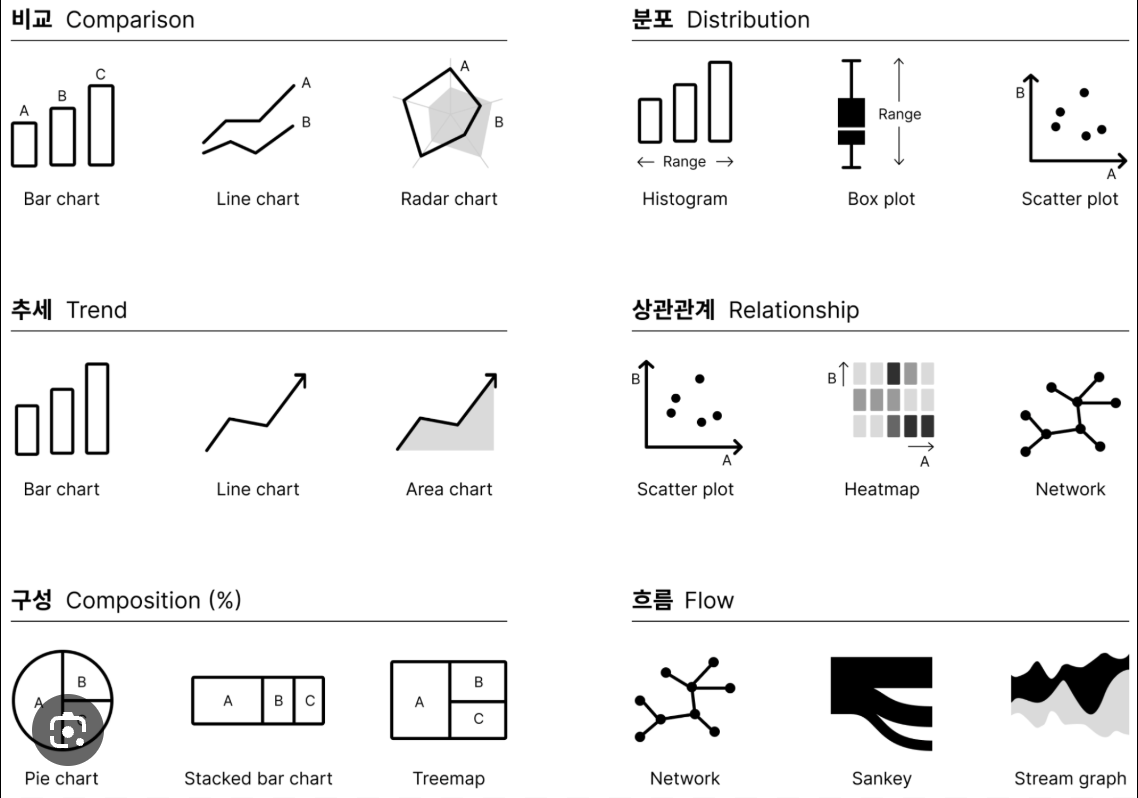

# ⭐️분석 시작

## 1. 필요한 컬럼만 남기기 

In [11]:
import pandas as pd
import os

# --- 설정 (Configuration) ---

# 입력 파일 경로 (사용자가 제공한 Kaggle 경로)
INPUT_FILE_PATH = '/kaggle/input/25-2-bigdata-practice/TMDB_cleaned_data.csv'

# 출력 파일 경로 (사용자가 제공한 Kaggle 작업 경로)
OUTPUT_DIR = '/kaggle/working/'
OUTPUT_FILE_NAME = 'selected_tmdb_data.csv'
OUTPUT_FILE_PATH = os.path.join(OUTPUT_DIR, OUTPUT_FILE_NAME)

# 선택할 컬럼 목록
REQUIRED_COLUMNS = [
    'id',
    'title',
    'budget',
    'popularity',
    'genres',
    'production_companies',
    'production_countries',
    'cast',
    'director',
    'writers',
    'year',
    'month'
]

print("--- TMDB 데이터 컬럼 선택 스크립트 시작 ---")
print(f"입력 파일: {INPUT_FILE_PATH}")

try:
    # 1. CSV 파일 읽기
    # read_csv에서 usecols 매개변수를 사용하여 필요한 컬럼만 효율적으로 읽어옵니다.
    df = pd.read_csv(INPUT_FILE_PATH, usecols=REQUIRED_COLUMNS)
    print(f"원본 데이터 로드 완료. (총 {len(df)} 행)")

    # 2. 필요한 컬럼만 선택
    # usecols를 사용했으므로 이 단계는 사실상 컬럼 순서 재배열 역할만 합니다.
    df_selected = df[REQUIRED_COLUMNS]
    
    # 3. 결과 DataFrame 확인
    print("\n선택된 컬럼의 DataFrame 미리보기:")
    print(df_selected.head())
    print(f"\nDataFrame 정보: {df_selected.shape} (행, 열)")
    print(f"선택된 컬럼 목록: {list(df_selected.columns)}")
    
    # 4. 새로운 CSV 파일로 저장 (Kaggle working 디렉토리에 저장)
    # index=False 옵션을 사용하여 DataFrame 인덱스는 파일에 저장하지 않습니다.
    df_selected.to_csv(OUTPUT_FILE_PATH, index=False)
    
    print(f"\n✅ 성공적으로 완료되었습니다!")
    print(f"결과 파일이 다음 위치에 저장되었습니다: {OUTPUT_FILE_PATH}")

except FileNotFoundError:
    print(f"\n❌ 오류: 파일을 찾을 수 없습니다. 경로를 다시 확인해 주세요: {INPUT_FILE_PATH}")
except ValueError as e:
    print(f"\n❌ 오류: 지정된 컬럼 중 일부가 데이터 파일에 없습니다. 오류 내용: {e}")
    print(f"요청된 컬럼: {REQUIRED_COLUMNS}")
except Exception as e:
    print(f"\n❌ 예기치 않은 오류가 발생했습니다: {e}")

print("\n--- TMDB 데이터 컬럼 선택 스크립트 종료 ---")


--- TMDB 데이터 컬럼 선택 스크립트 시작 ---
입력 파일: /kaggle/input/25-2-bigdata-practice/TMDB_cleaned_data.csv
원본 데이터 로드 완료. (총 4156 행)

선택된 컬럼의 DataFrame 미리보기:
       id                    title      budget  popularity  \
0   43615  Lula, the Son of Brazil   9500000.0      1.9972   
1  676945             La Despedida    300000.0      0.2200   
2   19901              Daybreakers  20000000.0      5.0070   
3   25195                Leap Year  19000000.0      6.2332   
4   29888           Dulha Mil Gaya   5600000.0      2.0790   

                             genres  \
0                    Drama, History   
1                            Comedy   
2  Action, Fantasy, Science Fiction   
3                   Romance, Comedy   
4            Comedy, Drama, Romance   

                                production_companies  \
0  LC Barreto, Filmes do Equador, InterVideo Prod...   
1  Panda Filmes, Malicia producciones, B. Iarden ...   
2  Lionsgate, Pictures in Paradise, Pacific Film ...   
3  Birnbaum/Barber Pro

## 2. 여러 장르를 행으로 나눠 저장/ 결측치 제거 

In [12]:
import pandas as pd
import os

# --- 설정 (Configuration) ---

# 이전 단계에서 저장된 파일 경로 (입력 파일)
INPUT_FILE_PATH = '/kaggle/working/selected_tmdb_data.csv'

# 최종 출력 파일 경로
OUTPUT_DIR = '/kaggle/working/'
OUTPUT_FILE_NAME = 'final_processed_tmdb_data_exploded.csv' # 파일 이름 변경
OUTPUT_FILE_PATH = os.path.join(OUTPUT_DIR, OUTPUT_FILE_NAME)

# 쉼표로 구분된 값을 개별 행으로 분리할 컬럼 목록 (Explode 대상)
COLUMNS_TO_EXPLODE = [
    'genres',
    'production_countries',
    'director',
    'writers'
]

print("--- 데이터 전처리 및 Explode 스크립트 시작 ---")
print(f"입력 파일: {INPUT_FILE_PATH}")

try:
    # 1. 데이터 로드
    df = pd.read_csv(INPUT_FILE_PATH)
    initial_rows = len(df)
    print(f"데이터 로드 완료. 초기 행 수: {initial_rows}")

    # 2. 결측치 (NaN) 제거
    # 데이터프레임의 어떤 컬럼이라도 결측치가 있는 행은 모두 제거합니다.
    df_cleaned = df.dropna().copy()
    rows_after_dropna = len(df_cleaned)
    print(f"✅ 결측치 제거 완료. 제거된 행: {initial_rows - rows_after_dropna}, 남은 행: {rows_after_dropna}")
    
    # 결측치 제거 후에도 데이터가 남아있는지 확인
    if df_cleaned.empty:
        print("경고: 결측치 제거 후 데이터가 비어있습니다. 스크립트를 종료합니다.")
        # 종료 대신 빈 파일을 생성할 수도 있지만, 여기서는 오류 메시지를 출력합니다.
        exit()

    # 3. Explode할 컬럼 전처리 및 분리 (Exploding)
    df_processed = df_cleaned.copy()
    
    for col in COLUMNS_TO_EXPLODE:
        # 3.1. 모든 값을 문자열로 변환하고 양쪽 공백 제거
        df_processed.loc[:, col] = df_processed[col].astype(str).str.strip()
        
        # 3.2. 쉼표(,)를 기준으로 분리하여 리스트 형태로 변환
        # .str.split(',')는 문자열을 리스트로 만듭니다.
        df_processed.loc[:, col] = df_processed[col].str.split(',')
        
        # 3.3. 리스트의 각 요소를 개별 행으로 분리 (Explode)
        df_processed = df_processed.explode(col)
        
        # 3.4. Explode 후 발생할 수 있는 추가 공백 제거
        df_processed.loc[:, col] = df_processed[col].str.strip()
        
        # 3.5. 분리된 값이 빈 문자열이거나 'None', 'Unknown'인 경우의 행 제거 
        # (데이터를 깔끔하게 유지하기 위한 추가 단계)
        df_processed = df_processed[df_processed[col] != ''].copy()
        df_processed = df_processed[df_processed[col] != 'None'].copy()
        df_processed = df_processed[df_processed[col] != 'Unknown'].copy()
        
        print(f"   > '{col}' 컬럼 Explode 완료. 현재 행 수: {len(df_processed)}")


    # 4. 최종 결과 확인
    final_rows = len(df_processed)
    print(f"\n최종 처리된 데이터의 행 수: {final_rows}")
    print("\n최종 DataFrame (Explode 적용) 미리보기:")
    # Explode된 컬럼을 포함하여 출력 (예시로 genres)
    print(df_processed[['id', 'title', 'genres', 'director']].head())
    
    # 5. 새로운 CSV 파일로 저장
    df_processed.to_csv(OUTPUT_FILE_PATH, index=False)
    
    print(f"\n✅ 데이터 전처리 및 Explode 작업이 이전 방식으로 성공적으로 복원되었습니다!")
    print(f"결과 파일이 다음 위치에 저장되었습니다: {OUTPUT_FILE_PATH}")

except FileNotFoundError:
    print(f"\n❌ 오류: 이전 단계의 입력 파일({INPUT_FILE_PATH})을 찾을 수 없습니다. 경로를 확인해 주세요.")
except Exception as e:
    print(f"\n❌ 예기치 않은 오류가 발생했습니다: {e}")
    import traceback
    print(traceback.format_exc())

print("\n--- 스크립트 종료 ---")


--- 데이터 전처리 및 Explode 스크립트 시작 ---
입력 파일: /kaggle/working/selected_tmdb_data.csv
데이터 로드 완료. 초기 행 수: 4156
✅ 결측치 제거 완료. 제거된 행: 175, 남은 행: 3981
   > 'genres' 컬럼 Explode 완료. 현재 행 수: 9747
   > 'production_countries' 컬럼 Explode 완료. 현재 행 수: 15624
   > 'director' 컬럼 Explode 완료. 현재 행 수: 16988
   > 'writers' 컬럼 Explode 완료. 현재 행 수: 45360

최종 처리된 데이터의 행 수: 45360

최종 DataFrame (Explode 적용) 미리보기:
      id                    title genres          director
0  43615  Lula, the Son of Brazil  Drama  Marcelo Santiago
0  43615  Lula, the Son of Brazil  Drama  Marcelo Santiago
0  43615  Lula, the Son of Brazil  Drama  Marcelo Santiago
0  43615  Lula, the Son of Brazil  Drama     Fábio Barreto
0  43615  Lula, the Son of Brazil  Drama     Fábio Barreto

✅ 데이터 전처리 및 Explode 작업이 이전 방식으로 성공적으로 복원되었습니다!
결과 파일이 다음 위치에 저장되었습니다: /kaggle/working/final_processed_tmdb_data_exploded.csv

--- 스크립트 종료 ---


## 3. 장르별 인기 동향 시각화 
라인 차트(시간에 따른 추세)와 누적 막대 그래프(시기별 비교)

--- 장르별 인기 동향 시각화 스크립트 시작 ---
입력 파일: /kaggle/working/final_processed_tmdb_data_exploded.csv
경고: NanumGothic 폰트가 시스템에 설치되어 있지 않을 수 있습니다. 폰트를 설치하거나 다른 폰트 이름을 사용해 주세요.
데이터 로드 완료. 총 행 수: 45360

[1/2] 시간의 흐름에 따른 장르별 인기도 추세 분석 (라인 차트)...


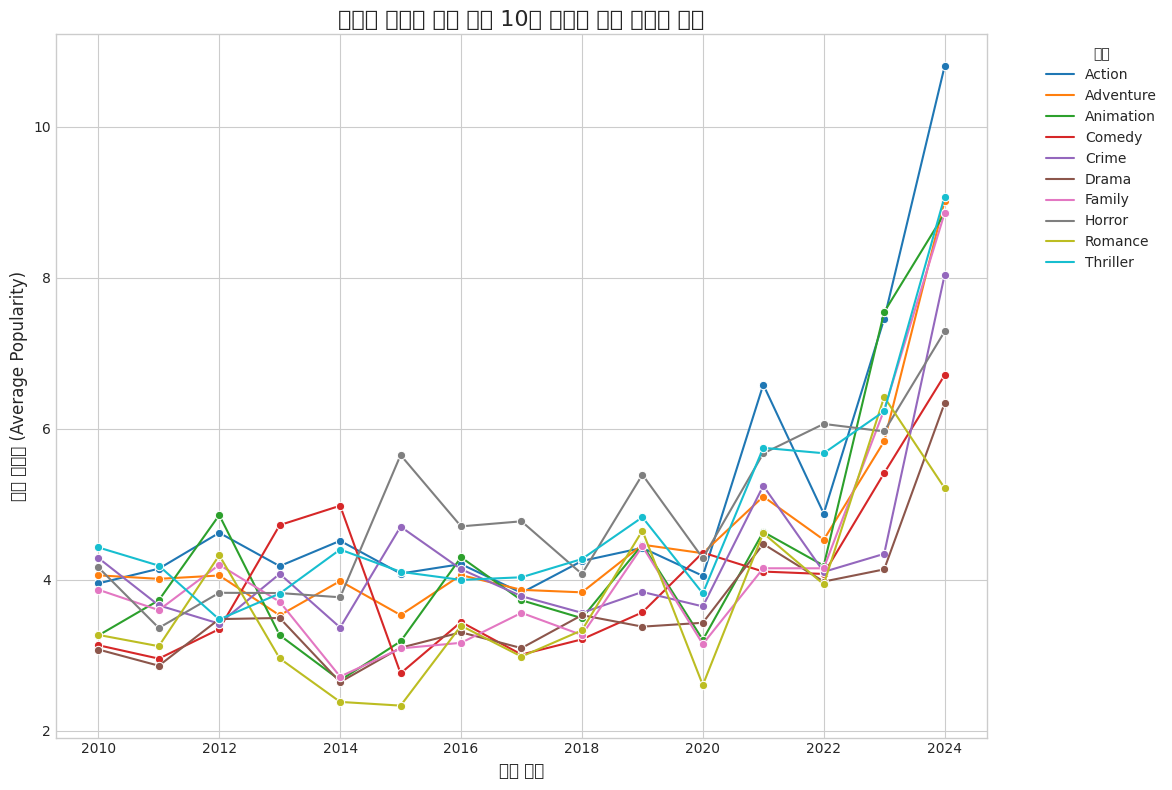


[2/2] 시기별 장르 인기도 점유율 비교 (누적 막대 그래프)...


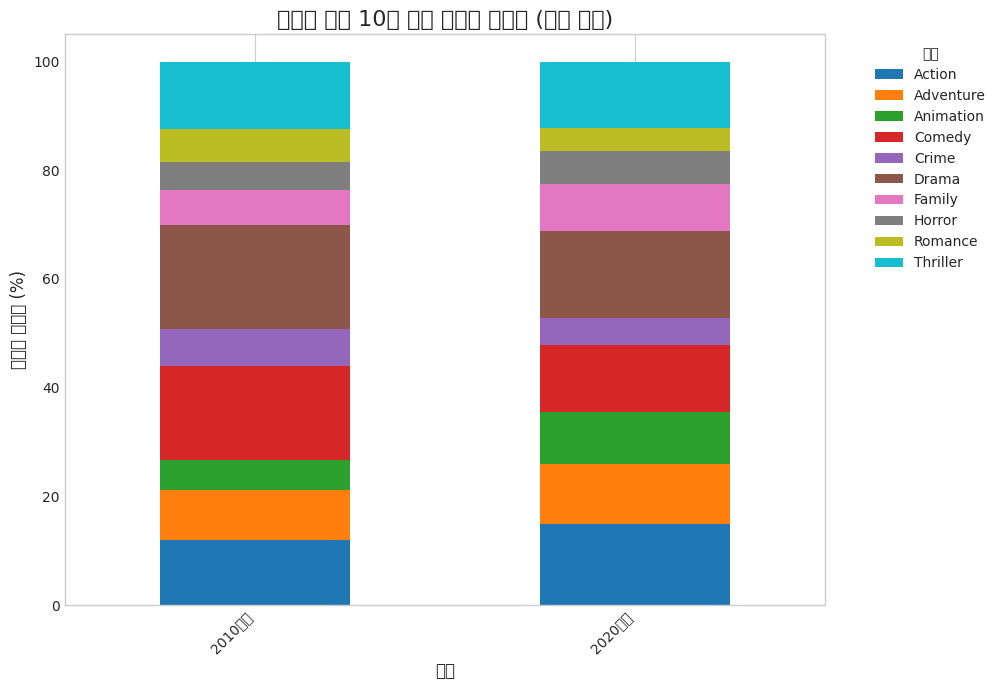


✅ 두 가지 시각화 작업이 성공적으로 완료되었습니다.

--- 스크립트 종료 ---


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# --- 설정 (Configuration) ---

# 이전 단계에서 저장된 Explode된 데이터 파일 경로
INPUT_FILE_PATH = '/kaggle/working/final_processed_tmdb_data_exploded.csv'

# 시각화 결과를 저장할 경로 (필요시 사용)
OUTPUT_DIR = '/kaggle/working/'

print("--- 장르별 인기 동향 시각화 스크립트 시작 ---")
print(f"입력 파일: {INPUT_FILE_PATH}")

# Matplotlib 및 Seaborn 스타일 설정
plt.style.use('seaborn-v0_8-whitegrid')

# =================================================================
# ✅ 한글 폰트 설정 부분 수정 (Kaggle/Colab 환경 대응)
# =================================================================
try:
    # 나눔 폰트 경로를 직접 지정 (일반적인 Kaggle 환경 경로)
    # 폰트가 설치되어 있어야 합니다. 만약 NanumGothic이 없으면 다른 폰트(Malgun Gothic 등)를 시도하세요.
    plt.rcParams['font.family'] = 'NanumGothic'
    
    # 폰트 캐시를 지우는 과정은 이 환경에서는 불필요하거나 복잡하므로,
    # 폰트 설정만 명확하게 지정하고 오류 방지 설정을 추가합니다.
    
    # 폰트 패밀리가 없을 경우를 대비해 예외 처리
    if 'NanumGothic' not in plt.matplotlib.font_manager.get_font_names():
        print("경고: NanumGothic 폰트가 시스템에 설치되어 있지 않을 수 있습니다. 폰트를 설치하거나 다른 폰트 이름을 사용해 주세요.")
        
except Exception as e:
    print(f"폰트 설정 중 오류 발생: {e}")
    # 기본 폰트로 되돌림
    plt.rcParams['font.family'] = 'sans-serif' 
# 마이너스 폰트 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False 

try:
    # 1. 데이터 로드
    df = pd.read_csv(INPUT_FILE_PATH)
    print(f"데이터 로드 완료. 총 행 수: {len(df)}")
    
    # 컬럼 이름 변경 (사용자 요청 반영: Id -> id)
    if 'Id' in df.columns:
        df.rename(columns={'Id': 'id'}, inplace=True)

    # 'popularity'와 'year' 컬럼이 유효한지 확인
    df = df.dropna(subset=['popularity', 'year', 'genres'])
    df['year'] = df['year'].astype(int)

    # --- 2. 시간의 흐름에 따른 장르별 추세 (라인 차트) ---

    print("\n[1/2] 시간의 흐름에 따른 장르별 인기도 추세 분석 (라인 차트)...")
    
    # 인기도가 너무 낮은 장르를 제외하고, 상위 10개 장르만 분석 대상으로 선정
    # genres 컬럼에서 빈 값/오류 값 정리 후 인기도 합계 기준 상위 10개 추출
    df_clean_genres = df[~df['genres'].isin(['', 'None', 'Unknown'])]
    
    top_genres = df_clean_genres.groupby('genres')['popularity'].sum().nlargest(10).index
    df_top_genres = df_clean_genres[df_clean_genres['genres'].isin(top_genres)]
    
    # 연도별, 장르별 인기도 평균 집계
    genre_trend = df_top_genres.groupby(['year', 'genres'])['popularity'].mean().reset_index()

    # 시각화
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=genre_trend, x='year', y='popularity', hue='genres', marker='o', 
                 palette=sns.color_palette("tab10", len(top_genres)))
    
    plt.title('시간의 흐름에 따른 상위 10개 장르별 평균 인기도 추세', fontsize=16)
    plt.xlabel('개봉 연도', fontsize=12)
    plt.ylabel('평균 인기도 (Average Popularity)', fontsize=12)
    plt.legend(title='장르', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout(rect=[0, 0, 0.85, 1]) # 레전드 공간 확보
    plt.savefig(os.path.join(OUTPUT_DIR, 'genre_popularity_trend_line_chart.png'))
    plt.show()

    # --- 3. 시기별 장르 인기도 비교 (누적 막대 그래프) ---
    
    print("\n[2/2] 시기별 장르 인기도 점유율 비교 (누적 막대 그래프)...")
    
    # 10년 단위로 시기를 구분합니다. (예: 1990s, 2000s, 2010s, 2020s)
    def categorize_decade(year):
        if year < 1980: return '1970년대 이전'
        return f"{int(year // 10) * 10}년대"
    
    df_top_genres['decade'] = df_top_genres['year'].apply(categorize_decade)
    
    # 시기별, 장르별 인기도 합계 계산
    genre_share = df_top_genres.groupby(['decade', 'genres'])['popularity'].sum().reset_index()

    # 시기별 총 인기도 계산 (비율 계산용)
    total_popularity_by_decade = genre_share.groupby('decade')['popularity'].sum()
    
    # 비율 계산
    genre_share['popularity_percentage'] = genre_share.apply(
        lambda row: (row['popularity'] / total_popularity_by_decade[row['decade']]) * 100, 
        axis=1
    )

    # 시각화
    plt.figure(figsize=(12, 7))
    
    # 누적 막대 그래프를 그리기 위해 피벗 테이블 생성
    genre_pivot = genre_share.pivot(index='decade', columns='genres', values='popularity_percentage').fillna(0)
    
    # 연대순으로 정렬
    decade_order = sorted(genre_pivot.index.unique())
    genre_pivot = genre_pivot.reindex(decade_order, axis=0)
    
    genre_pivot.plot(kind='bar', stacked=True, ax=plt.gca(), 
                     color=sns.color_palette("tab10", len(top_genres)))

    plt.title('시기별 상위 10개 장르 인기도 점유율 (누적 막대)', fontsize=16)
    plt.xlabel('시기', fontsize=12)
    plt.ylabel('인기도 점유율 (%)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='장르', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y')
    plt.tight_layout(rect=[0, 0, 0.85, 1]) # 레전드 공간 확보
    plt.savefig(os.path.join(OUTPUT_DIR, 'genre_popularity_share_stacked_bar_chart.png'))
    plt.show()

    print("\n✅ 두 가지 시각화 작업이 성공적으로 완료되었습니다.")

except FileNotFoundError:
    print(f"\n❌ 오류: 입력 파일({INPUT_FILE_PATH})을 찾을 수 없습니다. 이전 단계의 파일 경로를 확인해 주세요.")
except Exception as e:
    print(f"\n❌ 예기치 않은 오류가 발생했습니다: {e}")
    import traceback
    print(traceback.format_exc())

print("\n--- 스크립트 종료 ---")


## 3-2. 누적 막대 그래프 x축 범위 수정

--- Genre Popularity Trend Visualization Script Started ---
Input File: /kaggle/working/final_processed_tmdb_data_exploded.csv
Data loaded successfully. Total rows: 45360

[1/2] Analyzing Genre Popularity Trend (Line Chart)...


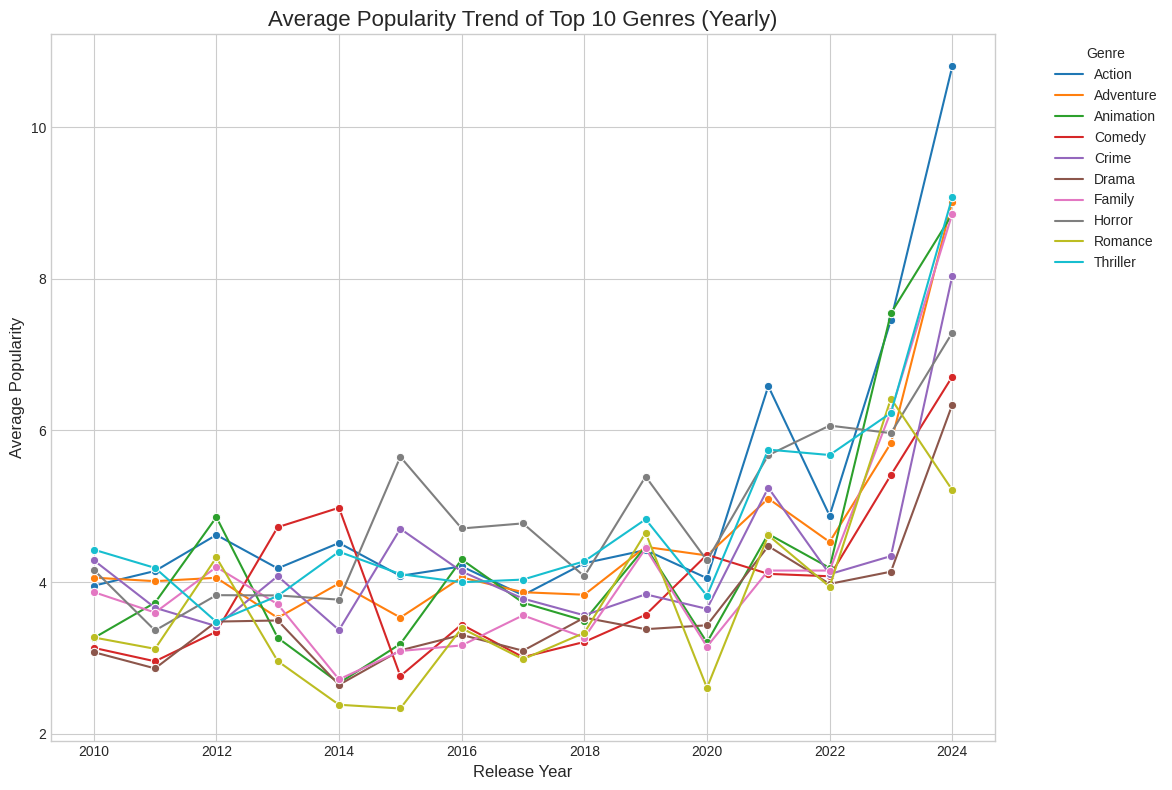


[2/2] Comparing Yearly Genre Popularity Share (Stacked Bar Chart - 1 Year)...
✅ Numerical share table saved to genre_yearly_share_table.md


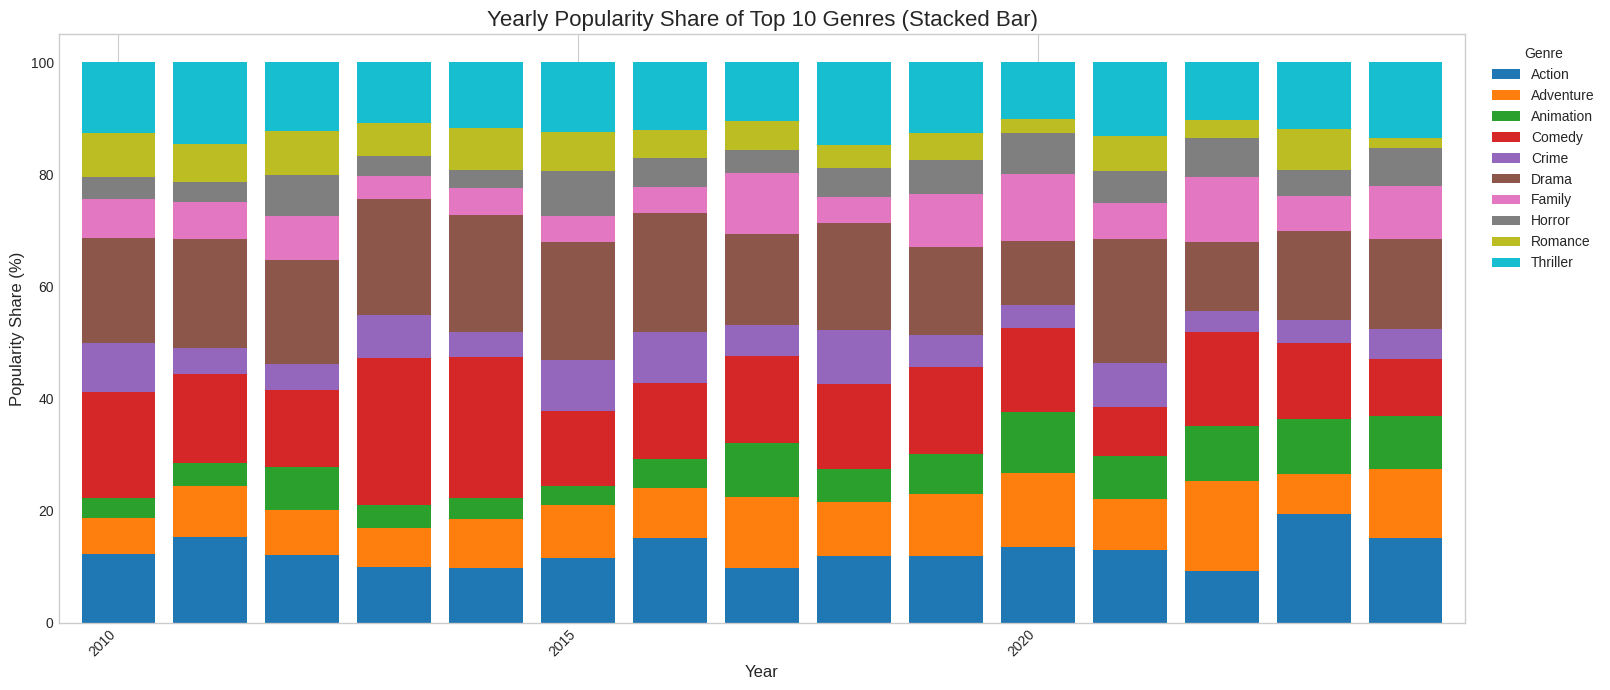


✅ Two visualizations and one data table have been successfully generated.

--- Script Finished ---


In [14]:
# -*- coding: utf-8 -*-
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# --- Configuration ---
# 이전 단계에서 저장된 Explode된 데이터 파일 경로
INPUT_FILE_PATH = '/kaggle/working/final_processed_tmdb_data_exploded.csv'
# 시각화 결과를 저장할 경로 (필요시 사용)
OUTPUT_DIR = '/kaggle/working/'

print("--- Genre Popularity Trend Visualization Script Started ---")
print(f"Input File: {INPUT_FILE_PATH}")

# Matplotlib 및 Seaborn 스타일 설정
# 폰트 깨짐 방지를 위해 모든 한글 폰트 설정을 제거하고 기본 폰트(sans-serif)를 사용합니다.
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# 표 (Markdown) 생성을 위한 함수
def create_share_table(df_pivot, filename):
    """
    5년 간격으로 장르 인기도 점유율을 담은 Markdown 테이블을 생성합니다.
    """
    # 5년 간격으로 연도 필터링
    years = df_pivot.index.tolist()
    # 5로 나누어 떨어지는 연도를 선택 (예: 2000, 2005, 2010...)
    selected_years = [year for year in years if year % 5 == 0]
    
    # 선택된 연도의 데이터만 추출
    table_data = df_pivot.loc[selected_years].round(2)
    
    # 인덱스(Year)를 컬럼으로 변환
    table_data = table_data.reset_index()
    
    # Markdown 포맷으로 변환
    markdown_table = table_data.to_markdown(index=False)
    
    # 파일 저장
    with open(os.path.join(OUTPUT_DIR, filename), 'w', encoding='utf-8') as f:
        f.write("## Yearly Genre Popularity Share (Selected Years)\n\n")
        f.write("This table shows the percentage share (%) of the top 10 genres' popularity for every 5th year.\n\n")
        f.write(markdown_table)
    
    print(f"✅ Numerical share table saved to {filename}")


try:
    # 1. 데이터 로드
    df = pd.read_csv(INPUT_FILE_PATH)
    print(f"Data loaded successfully. Total rows: {len(df)}")
    
    # 컬럼 이름 변경 (Id -> id)
    if 'Id' in df.columns:
        df.rename(columns={'Id': 'id'}, inplace=True)

    # 데이터 유효성 검사 및 정제
    df = df.dropna(subset=['popularity', 'year', 'genres'])
    df['year'] = df['year'].astype(int)

    # 인기도가 너무 낮은 장르를 제외하고, 상위 10개 장르만 분석 대상으로 선정
    df_clean_genres = df[~df['genres'].isin(['', 'None', 'Unknown'])]
    
    # 상위 10개 장르 선정
    top_genres = df_clean_genres.groupby('genres')['popularity'].sum().nlargest(10).index
    df_top_genres = df_clean_genres[df_clean_genres['genres'].isin(top_genres)]
    
    # --------------------------------------------------------
    # --- 2. Popularity Trend Over Time (Line Chart) ---
    # --------------------------------------------------------

    print("\n[1/2] Analyzing Genre Popularity Trend (Line Chart)...")
    
    # 연도별, 장르별 인기도 평균 집계
    genre_trend = df_top_genres.groupby(['year', 'genres'])['popularity'].mean().reset_index()

    # 시각화 (English Labels)
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=genre_trend, x='year', y='popularity', hue='genres', marker='o', 
                 palette=sns.color_palette("tab10", len(top_genres)))
    
    plt.title('Average Popularity Trend of Top 10 Genres (Yearly)', fontsize=16)
    plt.xlabel('Release Year', fontsize=12)
    plt.ylabel('Average Popularity', fontsize=12)
    plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.savefig(os.path.join(OUTPUT_DIR, 'genre_popularity_trend_line_chart_en.png'))
    plt.show()

    # --------------------------------------------------------
    # --- 3. Yearly Genre Popularity Share (Stacked Bar Chart) ---
    # --------------------------------------------------------
    
    print("\n[2/2] Comparing Yearly Genre Popularity Share (Stacked Bar Chart - 1 Year)...")
    
    # 연도별, 장르별 인기도 합계 계산 (Grouping by 'year')
    genre_share = df_top_genres.groupby(['year', 'genres'])['popularity'].sum().reset_index()

    # 연도별 총 인기도 계산 (비율 계산용)
    total_popularity_by_year = genre_share.groupby('year')['popularity'].sum()
    
    # 비율 계산
    genre_share['popularity_percentage'] = genre_share.apply(
        lambda row: (row['popularity'] / total_popularity_by_year[row['year']]) * 100, 
        axis=1
    )

    # 누적 막대 그래프를 그리기 위해 피벗 테이블 생성
    genre_pivot = genre_share.pivot(index='year', columns='genres', values='popularity_percentage').fillna(0)
    genre_pivot = genre_pivot.sort_index(axis=0) # 연도순으로 정렬
    
    # --------------------------------------------------------
    # --- 3-1. 수치 확인을 위한 Markdown 표 생성 ---
    # --------------------------------------------------------
    create_share_table(genre_pivot, 'genre_yearly_share_table.md')

    # --------------------------------------------------------
    # --- 3-2. Stacked Bar Chart 시각화 ---
    # --------------------------------------------------------
    
    plt.figure(figsize=(18, 7)) # 가로 길이를 늘려서 많은 연도를 표시할 공간 확보
    
    genre_pivot.plot(kind='bar', stacked=True, ax=plt.gca(), 
                     color=sns.color_palette("tab10", len(top_genres)), width=0.8)

    plt.title('Yearly Popularity Share of Top 10 Genres (Stacked Bar)', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Popularity Share (%)', fontsize=12)
    
    # X축 레이블 간격 조정 (5년마다 표시)
    current_years = genre_pivot.index.tolist()
    xticks_positions = [i for i, year in enumerate(current_years) if year % 5 == 0]
    xticks_labels = [str(current_years[i]) for i in xticks_positions]
    
    plt.xticks(xticks_positions, xticks_labels, rotation=45, ha='right')
    
    plt.legend(title='Genre', bbox_to_anchor=(1.01, 1), loc='upper left')
    plt.grid(axis='y')
    plt.tight_layout(rect=[0, 0, 0.9, 1]) # Legend 공간 확보
    plt.savefig(os.path.join(OUTPUT_DIR, 'genre_popularity_share_stacked_bar_chart_yearly_en.png'))
    plt.show()

    print("\n✅ Two visualizations and one data table have been successfully generated.")

except FileNotFoundError:
    print(f"\n❌ Error: Input file ({INPUT_FILE_PATH}) not found. Please check the path from previous steps.")
except Exception as e:
    print(f"\n❌ An unexpected error occurred: {e}")
    import traceback
    print(traceback.format_exc())

print("\n--- Script Finished ---")


## 3-2-2. 누적 막대 그래프 수치 표시 

In [15]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np

# --- 1. 경로 설정 및 상수 정의 ---
# TMDB 원본 데이터 파일 경로
INPUT_FILE_PATH = '/kaggle/input/25-2-bigdata-practice/TMDB_cleaned_data.csv'
# 결과 CSV 파일이 저장될 경로
OUTPUT_DIR = '/kaggle/working/'

# 상위 10개 장르 (이전 분석에서 사용된 장르 목록)
TOP_GENRES = [
    'Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
    'Documentary', 'Drama', 'Family', 'Fantasy', 'Thriller'
]

# --- 2. 핵심 함수: 데이터 처리 및 점유율 계산 ---

def calculate_genre_share(df_raw, value_col, year_range=(2010, 2024)):
    # 1. 필요한 컬럼만 추출 및 유효한 행 필터링
    df = df_raw.copy()
    df = df.dropna(subset=['year', 'genres', value_col])
    df['year'] = df['year'].astype(int)
    
    # 2. 분석 연도 범위 및 상위 장르 필터링
    df = df[(df['year'] >= year_range[0]) & (df['year'] <= year_range[1])]
    
    # 'genres' 문자열을 리스트로 변환 (Explode 준비)
    df['genres'] = df['genres'].str.split(', ')
    
    # 3. 장르별 행 확장 (Explode)
    df_exploded = df.explode('genres')
    df_exploded = df_exploded[df_exploded['genres'].isin(TOP_GENRES)]
    
    # 4. 연도별, 장르별 Value (인기도 또는 투표수) 합계 계산
    genre_sum_by_year = df_exploded.groupby(['year', 'genres'])[value_col].sum().reset_index()

    # 5. 연도별 총 Value 합계 계산 (비율 계산용)
    total_sum_by_year = genre_sum_by_year.groupby('year')[value_col].sum()
    
    # 6. 비율 계산 (점유율 %)
    genre_sum_by_year['share_percentage'] = genre_sum_by_year.apply(
        lambda row: (row[value_col] / total_sum_by_year.loc[row['year']]) * 100, 
        axis=1
    )
    
    # 7. 피벗 테이블 형태로 변환
    df_pivot = genre_sum_by_year.pivot(index='year', columns='genres', values='share_percentage').fillna(0)
    
    # 8. 모든 TOP_GENRES 컬럼이 존재하도록 보장
    for genre in TOP_GENRES:
        if genre not in df_pivot.columns:
            df_pivot[genre] = 0.0
            
    # 9. 컬럼 순서 정렬
    df_pivot = df_pivot[TOP_GENRES]
    
    return df_pivot.sort_index()

def add_statistics_rows(df_pivot):
    # 통계 행 추가
    df_stats = df_pivot.copy()
    
    # 평균
    df_stats.loc['평균'] = df_pivot.mean()
    # 최고점
    df_stats.loc['최고점 (Max)'] = df_pivot.max()
    # 최저점
    df_stats.loc['최저점 (Min)'] = df_pivot.min()
    
    # 소수점 둘째 자리까지 반올림
    return df_stats.round(2)


# --- 3. 메인 실행 로직 ---
if __name__ == '__main__':
    try:
        # 데이터 로드
        df_raw = pd.read_csv(INPUT_FILE_PATH)
        print("✅ 데이터 로드 완료.")
        
        # --- 3-1. 인기도 점유율 계산 ---
        df_popularity_share = calculate_genre_share(df_raw, 'popularity')
        df_popularity_final = add_statistics_rows(df_popularity_share)
        
        # 파일 저장
        output_path_pop = os.path.join(OUTPUT_DIR, 'genre_popularity_share_final.csv')
        df_popularity_final.to_csv(output_path_pop, encoding='utf-8')
        print(f"✅ 인기도 점유율 데이터 저장 완료: {output_path_pop}")
        
        # --- 3-2. 투표 수 (관심도) 점유율 계산 ---
        df_vote_share = calculate_genre_share(df_raw, 'vote_count')
        df_vote_final = add_statistics_rows(df_vote_share)

        # 파일 저장
        output_path_vote = os.path.join(OUTPUT_DIR, 'genre_vote_share_final.csv')
        df_vote_final.to_csv(output_path_vote, encoding='utf-8')
        print(f"✅ 투표 수 점유율 데이터 저장 완료: {output_path_vote}")

    except FileNotFoundError:
        print(f"❌ 오류: 입력 파일({INPUT_FILE_PATH})을 찾을 수 없습니다. 경로를 확인해 주세요.")
    except Exception as e:
        print(f"❌ 예기치 않은 오류 발생: {e}")
        import traceback
        print(traceback.format_exc())


✅ 데이터 로드 완료.
✅ 인기도 점유율 데이터 저장 완료: /kaggle/working/genre_popularity_share_final.csv
✅ 투표 수 점유율 데이터 저장 완료: /kaggle/working/genre_vote_share_final.csv


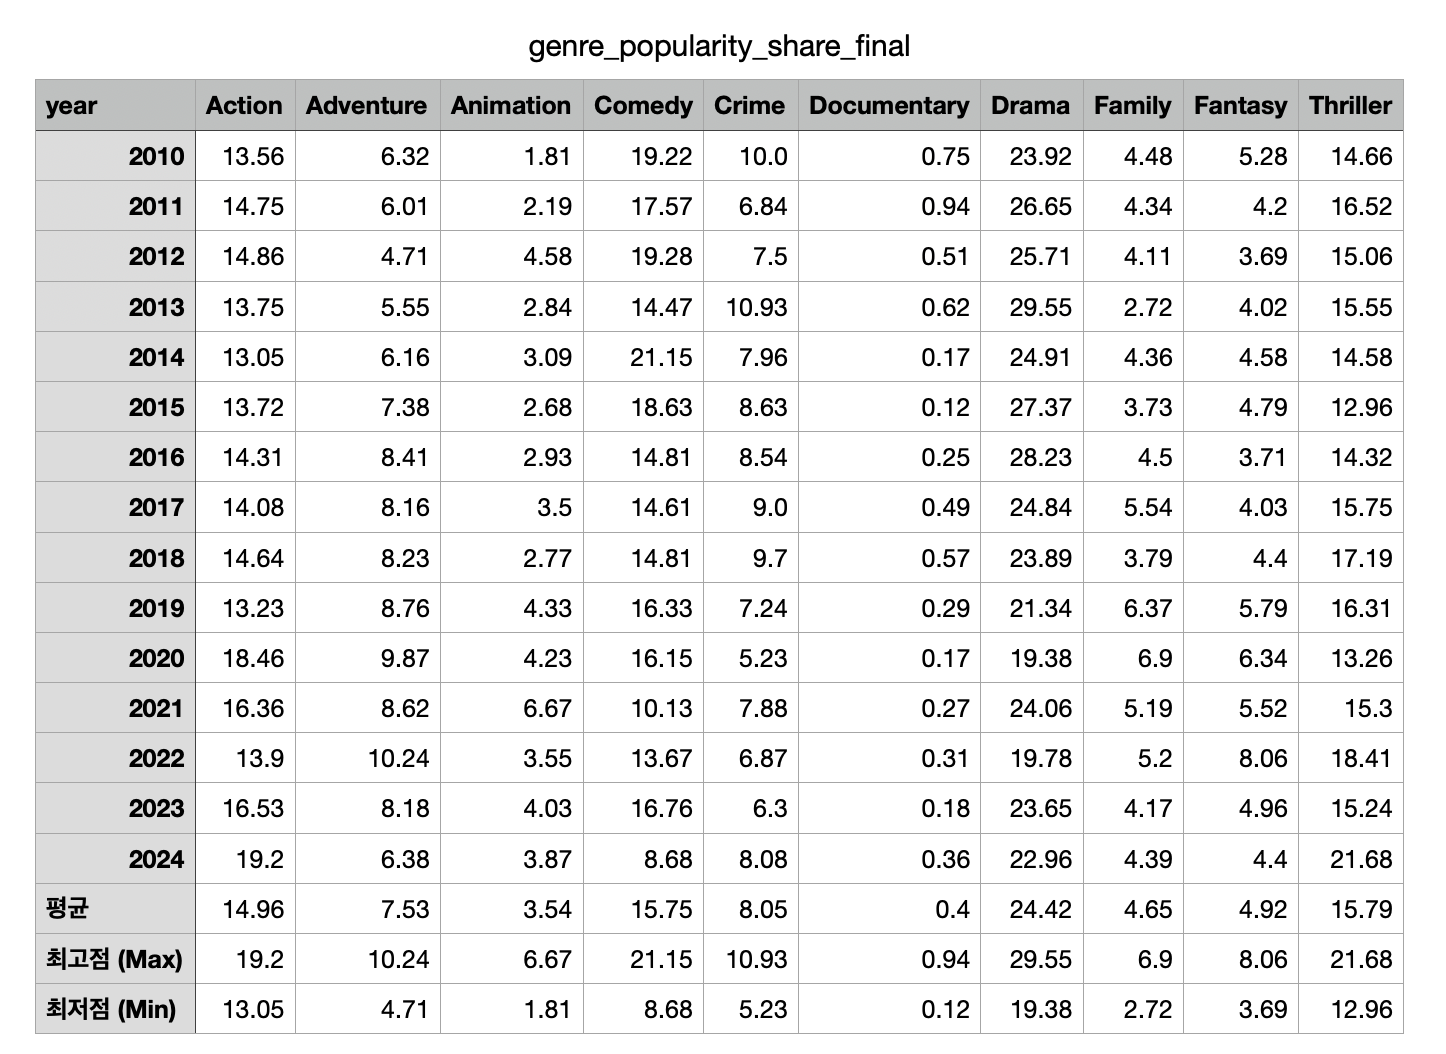

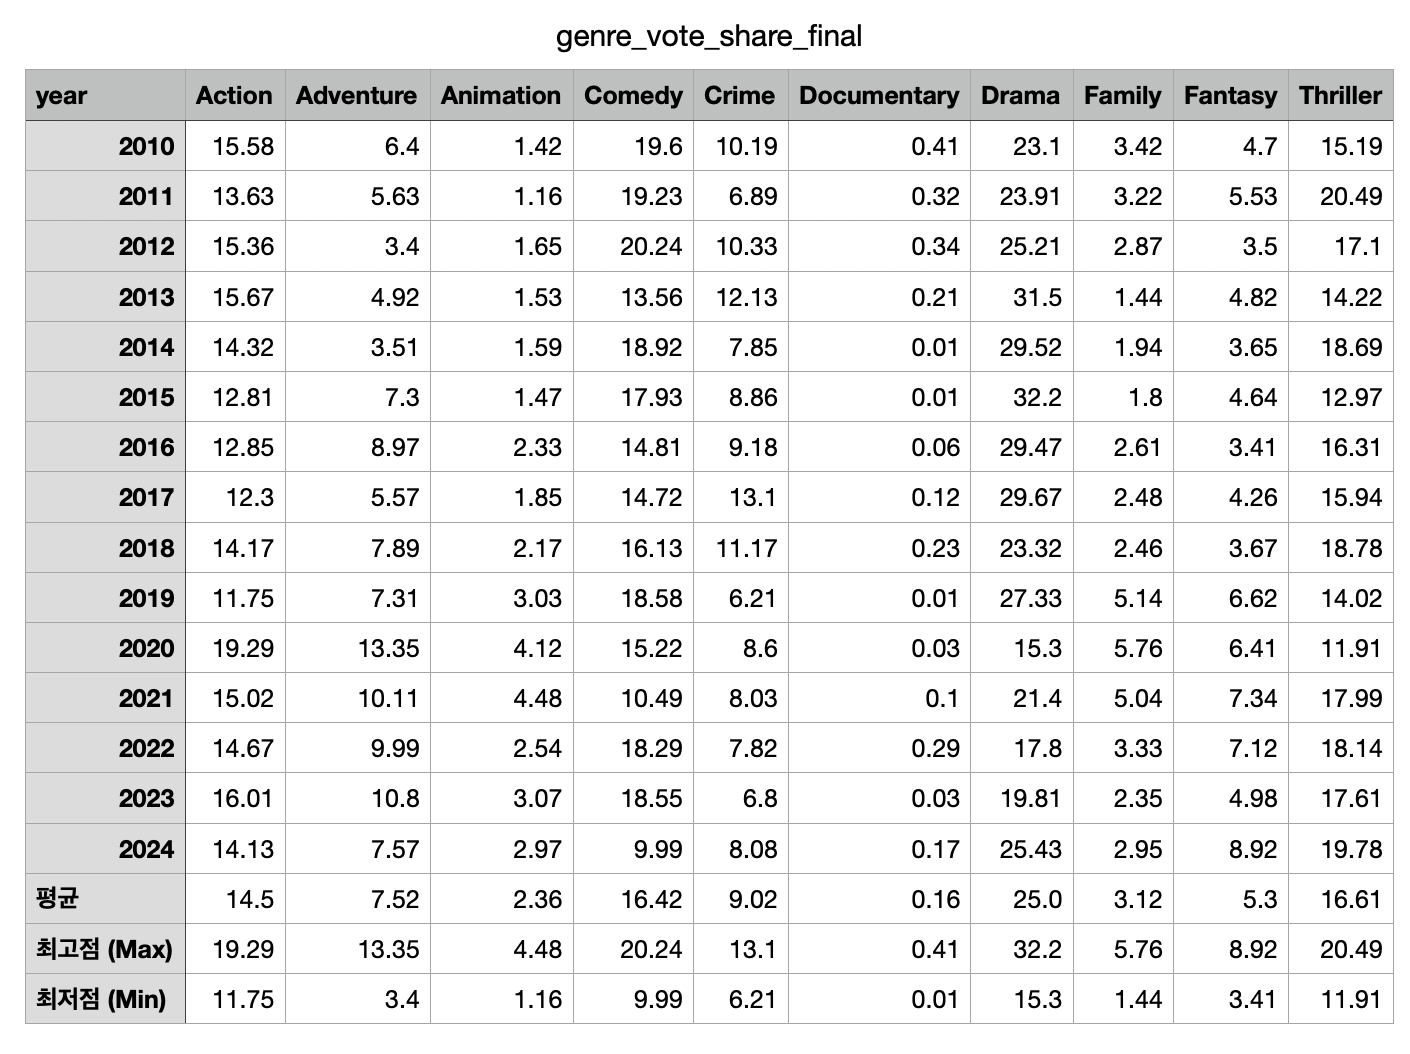

## 3-3. 라인 차트의 장르를 두 그룹으로 나눠 그리기 

--- 장르별 인기 동향 시각화 스크립트 시작 ---
입력 파일: /kaggle/working/final_processed_tmdb_data_exploded.csv
경고: NanumGothic 폰트가 시스템에 설치되어 있지 않을 수 있습니다. 폰트 설치를 고려해 주세요.
데이터 로드 완료. 총 행 수: 45360

[1/2] 시간의 흐름에 따른 장르별 인기도 추세 분석 (라인 차트 - 2개 그룹 분할)...


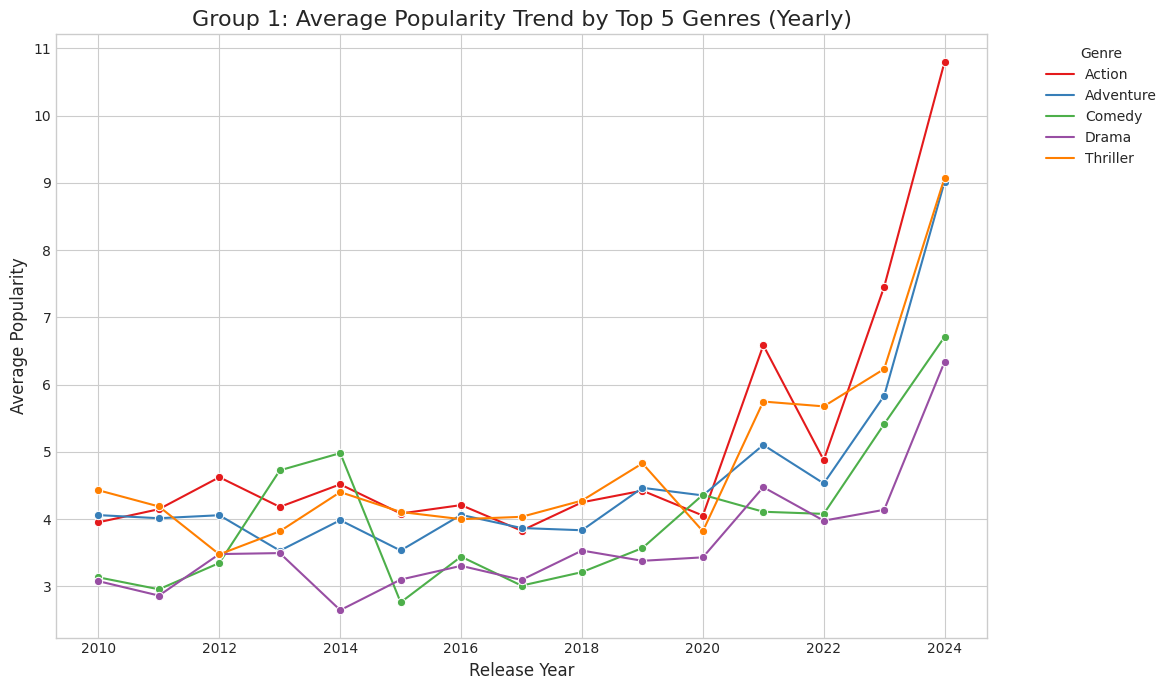

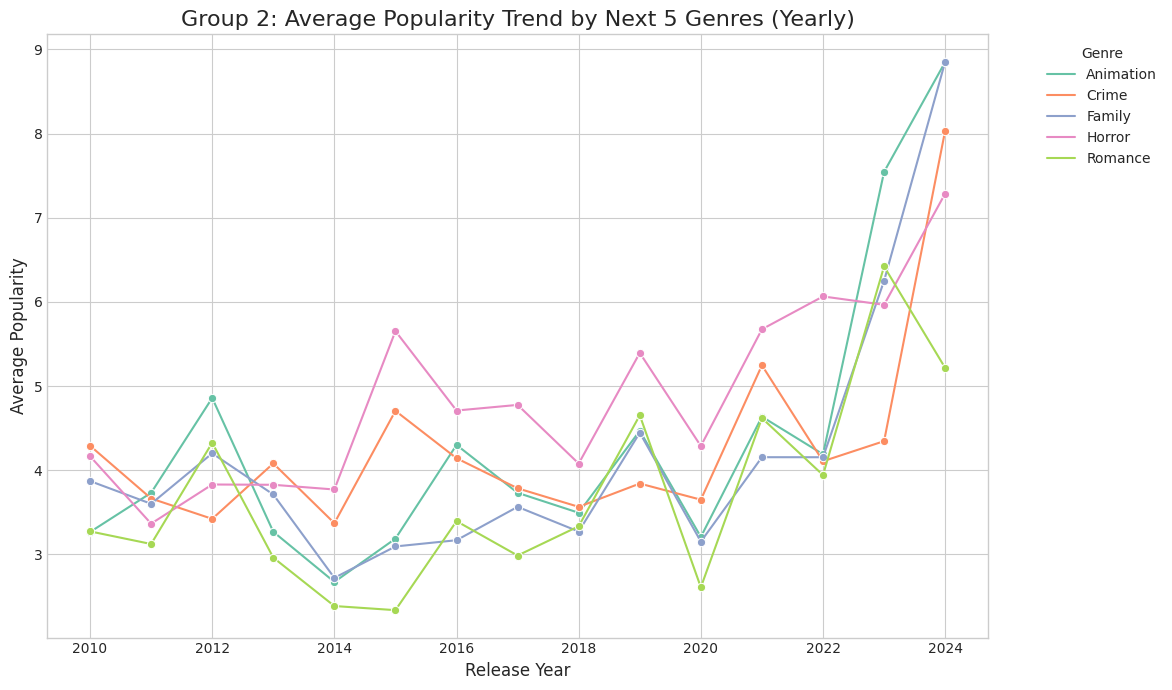


[2/2] 연도별 장르 인기도 점유율 비교 (누적 막대 그래프 - 1년 단위)...


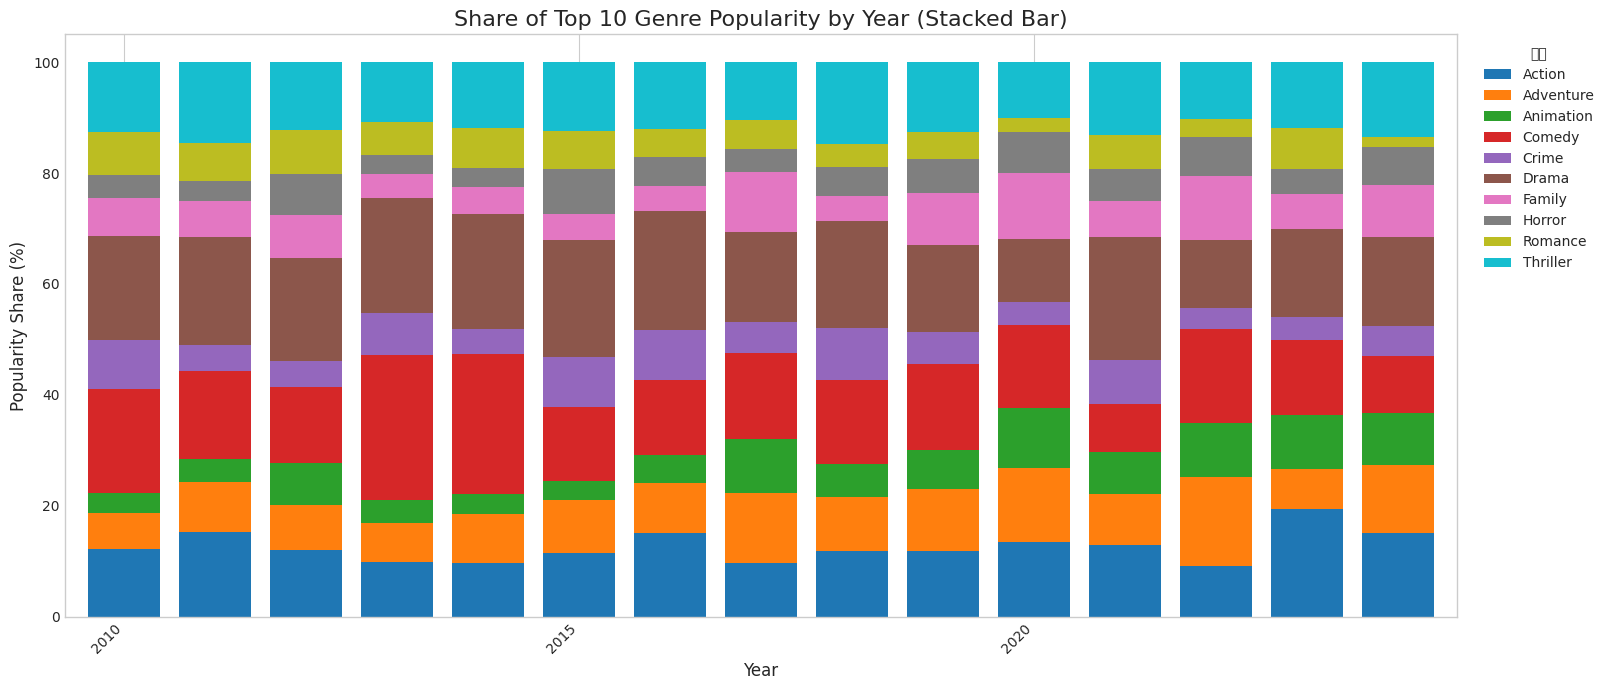


✅ 두 가지 시각화 작업이 성공적으로 완료되었습니다.

--- 스크립트 종료 ---


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# --- 설정 (Configuration) ---

# 이전 단계에서 저장된 Explode된 데이터 파일 경로
INPUT_FILE_PATH = '/kaggle/working/final_processed_tmdb_data_exploded.csv'

# 시각화 결과를 저장할 경로 (필요시 사용)
OUTPUT_DIR = '/kaggle/working/'

print("--- 장르별 인기 동향 시각화 스크립트 시작 ---")
print(f"입력 파일: {INPUT_FILE_PATH}")

# Matplotlib 및 Seaborn 스타일 설정
plt.style.use('seaborn-v0_8-whitegrid')

# 한글 폰트 설정 (Kaggle/Colab 환경 대응)
try:
    plt.rcParams['font.family'] = 'NanumGothic'
    if 'NanumGothic' not in plt.matplotlib.font_manager.get_font_names():
        print("경고: NanumGothic 폰트가 시스템에 설치되어 있지 않을 수 있습니다. 폰트 설치를 고려해 주세요.")
except Exception as e:
    print(f"폰트 설정 중 오류 발생: {e}")
    plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['axes.unicode_minus'] = False # 마이너스 폰트 깨짐 방지

try:
    # 1. 데이터 로드
    df = pd.read_csv(INPUT_FILE_PATH)
    print(f"데이터 로드 완료. 총 행 수: {len(df)}")
    
    # 컬럼 이름 변경 (사용자 요청 반영: Id -> id)
    if 'Id' in df.columns:
        df.rename(columns={'Id': 'id'}, inplace=True)

    # 'popularity'와 'year' 컬럼이 유효한지 확인
    df = df.dropna(subset=['popularity', 'year', 'genres'])
    df['year'] = df['year'].astype(int)

    # 인기도가 너무 낮은 장르를 제외하고, 상위 10개 장르만 분석 대상으로 선정
    df_clean_genres = df[~df['genres'].isin(['', 'None', 'Unknown'])]
    
    # 상위 10개 장르 선정
    top_genres = df_clean_genres.groupby('genres')['popularity'].sum().nlargest(10).index.tolist()
    df_top_genres = df_clean_genres[df_clean_genres['genres'].isin(top_genres)]
    
    # 연도별, 장르별 인기도 평균 집계
    genre_trend = df_top_genres.groupby(['year', 'genres'])['popularity'].mean().reset_index()

    # --------------------------------------------------------
    # --- 2. 시간의 흐름에 따른 장르별 추세 (라인 차트 - 2개 그룹) ---
    # --------------------------------------------------------

    print("\n[1/2] 시간의 흐름에 따른 장르별 인기도 추세 분석 (라인 차트 - 2개 그룹 분할)...")
    
    # 상위 10개 장르를 두 그룹으로 분할 (5개씩)
    group1_genres = top_genres[:5]
    group2_genres = top_genres[5:]
    
    df_group1 = genre_trend[genre_trend['genres'].isin(group1_genres)]
    df_group2 = genre_trend[genre_trend['genres'].isin(group2_genres)]
    
    # Group 1 시각화
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=df_group1, x='year', y='popularity', hue='genres', marker='o', 
                 palette=sns.color_palette("Set1", len(group1_genres)))
     
    plt.title(f'Group 1: Average Popularity Trend by Top {len(group1_genres)} Genres (Yearly)', fontsize=16)
    plt.xlabel('Release Year', fontsize=12)
    plt.ylabel('Average Popularity', fontsize=12)
    plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.savefig(os.path.join(OUTPUT_DIR, 'genre_popularity_trend_line_chart_group1.png'))
    plt.show()
     
    # Group 2 시각화
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=df_group2, x='year', y='popularity', hue='genres', marker='o', 
                 palette=sns.color_palette("Set2", len(group2_genres)))
     
    plt.title(f'Group 2: Average Popularity Trend by Next {len(group2_genres)} Genres (Yearly)', fontsize=16)
    plt.xlabel('Release Year', fontsize=12)
    plt.ylabel('Average Popularity', fontsize=12)
    plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.savefig(os.path.join(OUTPUT_DIR, 'genre_popularity_trend_line_chart_group2.png'))
    plt.show()

    # --------------------------------------------------------
    # --- 3. 연도별 장르 인기도 비교 (누적 막대 그래프) ---
    #         **시기 구분 단위: 1년**
    # --------------------------------------------------------
    
    print("\n[2/2] 연도별 장르 인기도 점유율 비교 (누적 막대 그래프 - 1년 단위)...")
    
    # 연도별, 장르별 인기도 합계 계산 (Grouping by 'year')
    genre_share = df_top_genres.groupby(['year', 'genres'])['popularity'].sum().reset_index()

    # 연도별 총 인기도 계산 (비율 계산용)
    total_popularity_by_year = genre_share.groupby('year')['popularity'].sum()
    
    # 비율 계산
    genre_share['popularity_percentage'] = genre_share.apply(
        lambda row: (row['popularity'] / total_popularity_by_year[row['year']]) * 100, 
        axis=1
    )

    # 시각화
    # 1년 단위는 데이터 포인트가 많아 x축 레이블을 촘촘히 표시하면 가독성이 떨어지므로,
    # 연도를 5년 간격으로만 표시하도록 설정합니다.
    plt.figure(figsize=(18, 7)) # 가로 길이를 늘려서 많은 연도를 표시할 공간 확보
    
    # 누적 막대 그래프를 그리기 위해 피벗 테이블 생성
    genre_pivot = genre_share.pivot(index='year', columns='genres', values='popularity_percentage').fillna(0)
    
    # 연도순으로 정렬
    genre_pivot = genre_pivot.sort_index(axis=0)
    
    genre_pivot.plot(kind='bar', stacked=True, ax=plt.gca(), 
                     color=sns.color_palette("tab10", len(top_genres)), width=0.8)

    plt.title('Share of Top 10 Genre Popularity by Year (Stacked Bar)', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Popularity Share (%)', fontsize=12)
    
    # X축 레이블 간격 조정 (5년마다 표시)
    current_years = genre_pivot.index.tolist()
    xticks_positions = [i for i, year in enumerate(current_years) if year % 5 == 0]
    xticks_labels = [str(current_years[i]) for i in xticks_positions]
    
    # 모든 연도를 표시하면 너무 촘촘해지므로 5년 단위로 표시합니다.
    plt.xticks(xticks_positions, xticks_labels, rotation=45, ha='right')
    
    plt.legend(title='장르', bbox_to_anchor=(1.01, 1), loc='upper left')
    plt.grid(axis='y')
    plt.tight_layout(rect=[0, 0, 0.9, 1]) # 레전드 공간 확보
    plt.savefig(os.path.join(OUTPUT_DIR, 'genre_popularity_share_stacked_bar_chart_yearly.png'))
    plt.show()

    print("\n✅ 두 가지 시각화 작업이 성공적으로 완료되었습니다.")

except FileNotFoundError:
    print(f"\n❌ 오류: 입력 파일({INPUT_FILE_PATH})을 찾을 수 없습니다. 이전 단계의 파일 경로를 확인해 주세요.")
except Exception as e:
    print(f"\n❌ 예기치 않은 오류가 발생했습니다: {e}")
    import traceback
    print(traceback.format_exc())

print("\n--- 스크립트 종료 ---")


## 4. 시계열 분해 

--- 장르별 인기도 시계열 분해 스크립트 시작 ---
입력 파일: /kaggle/working/final_processed_tmdb_data_exploded.csv

분석 대상 장르 (인기도 상위 5개): ['Drama', 'Comedy', 'Action', 'Thriller', 'Adventure']

✅ 시계열 분해 (월별 평균 인기도, 주기=12개월) 시작...


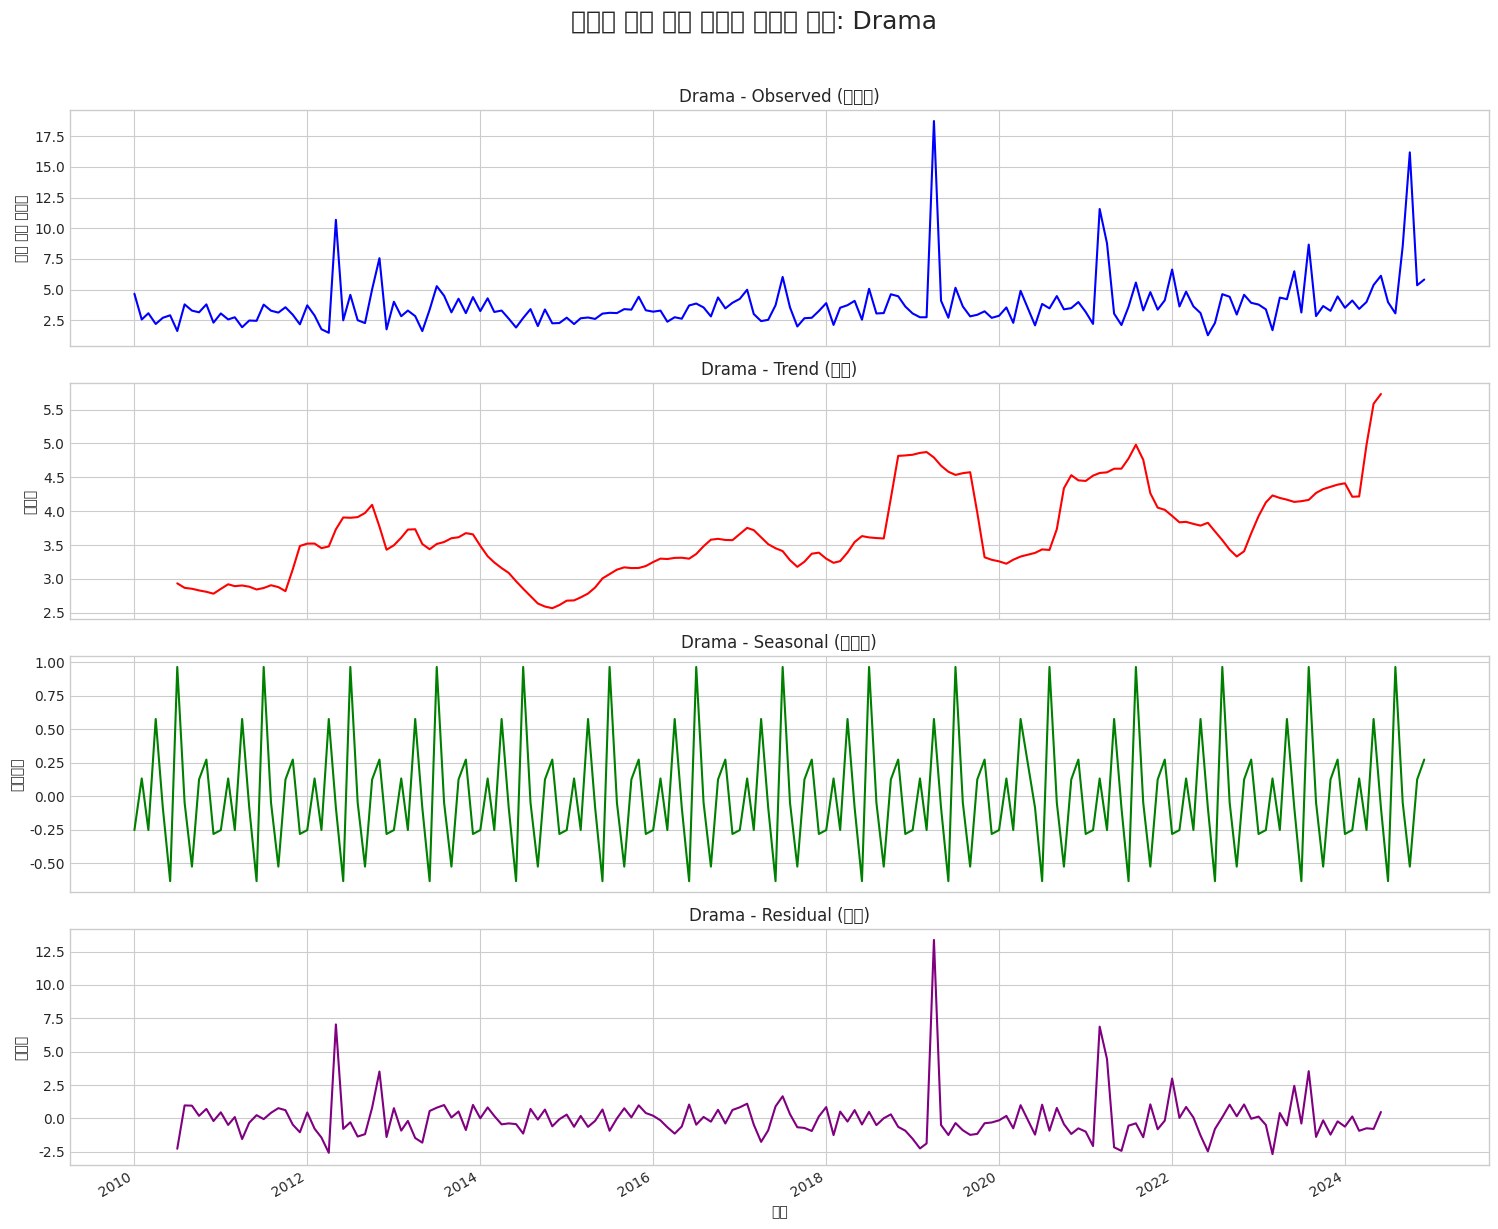

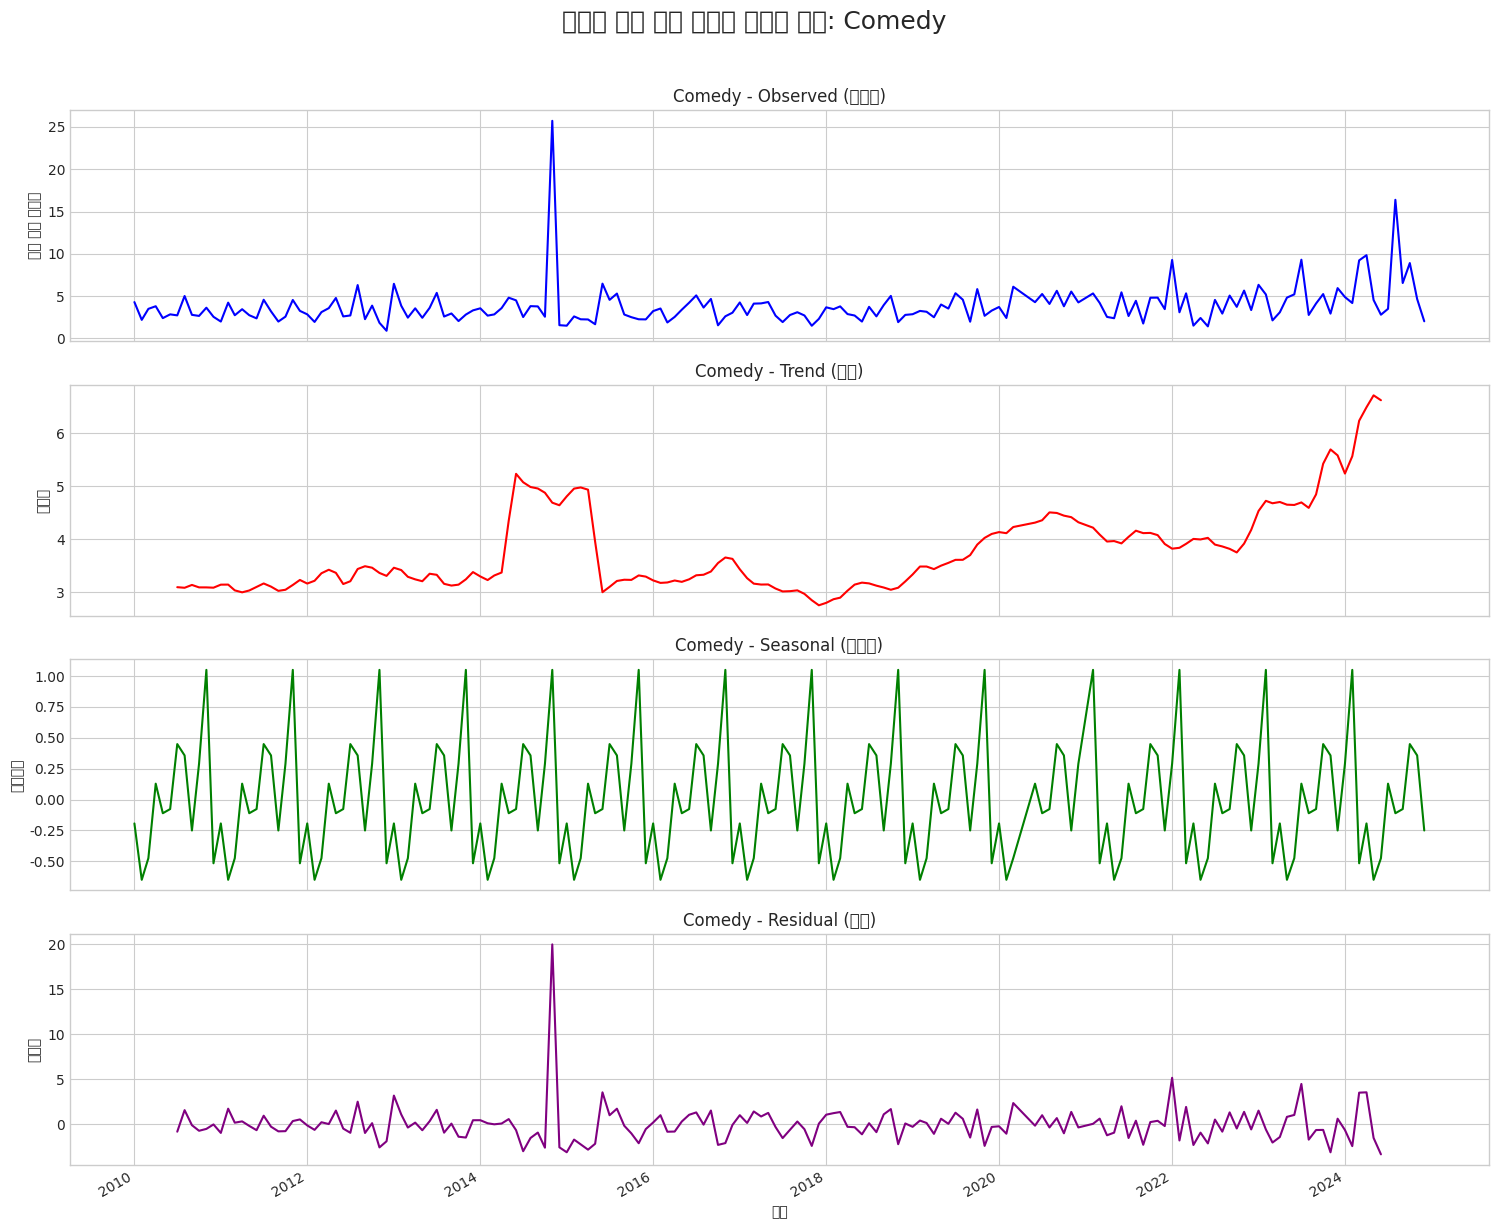

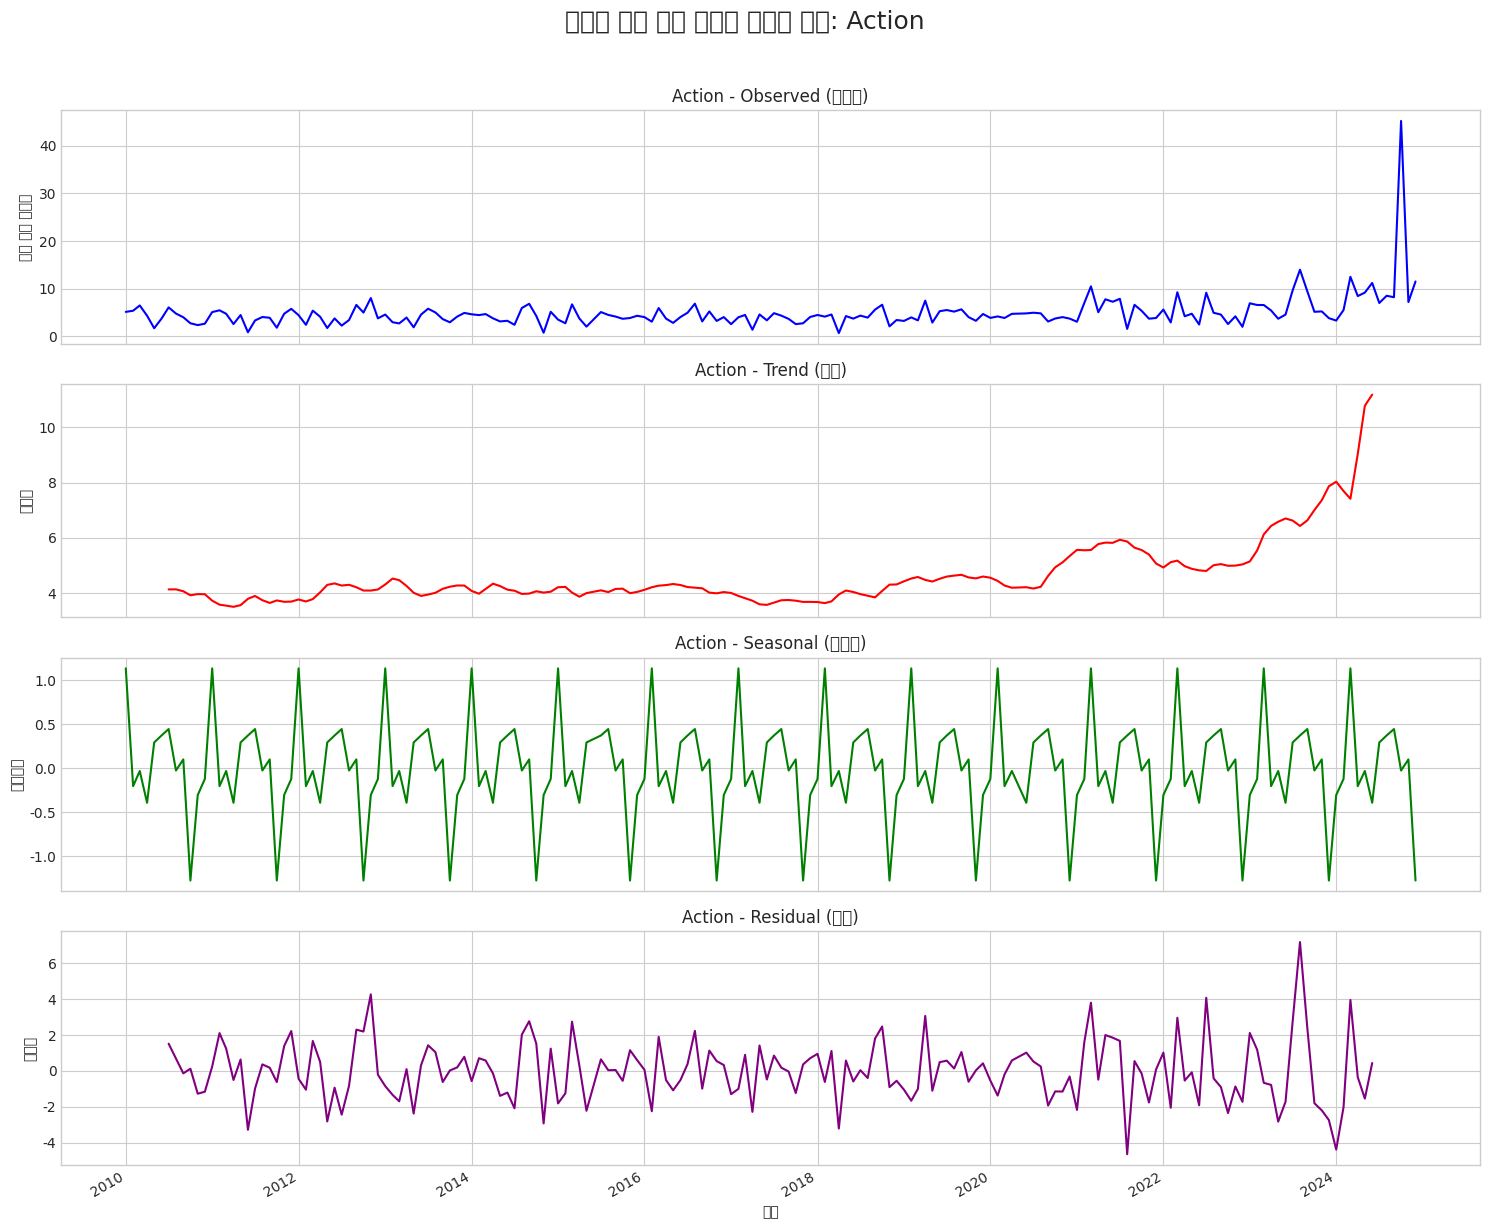

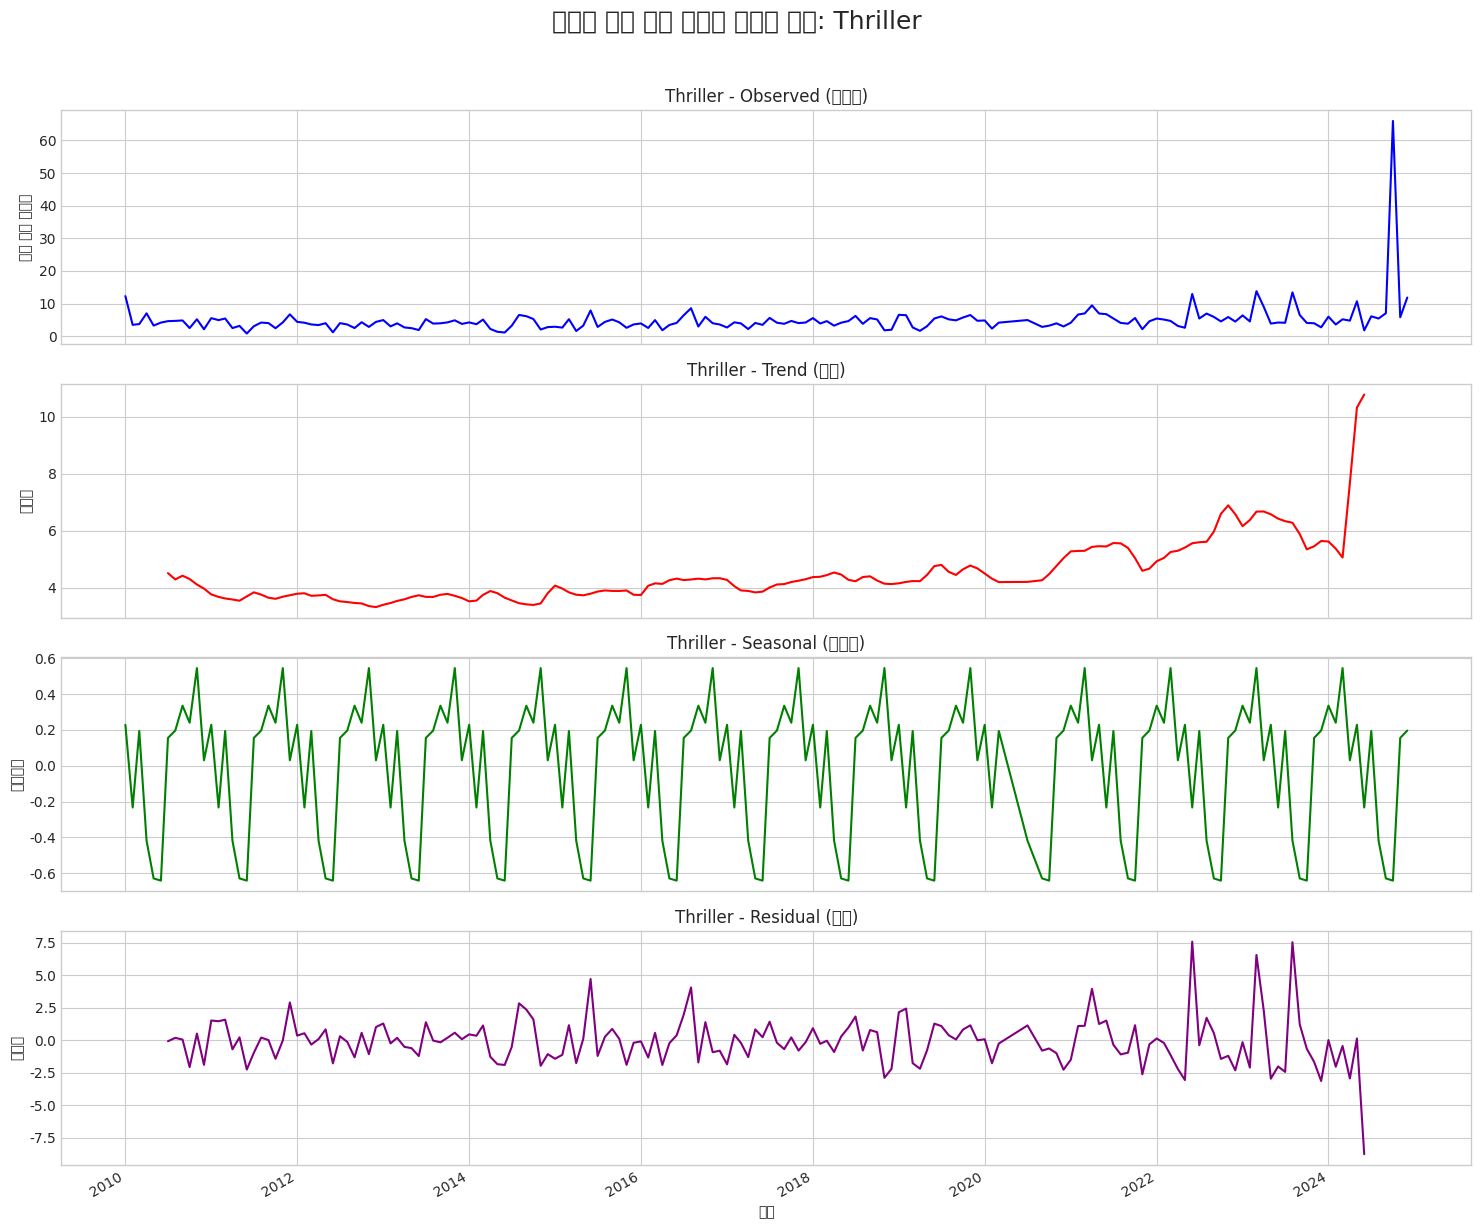

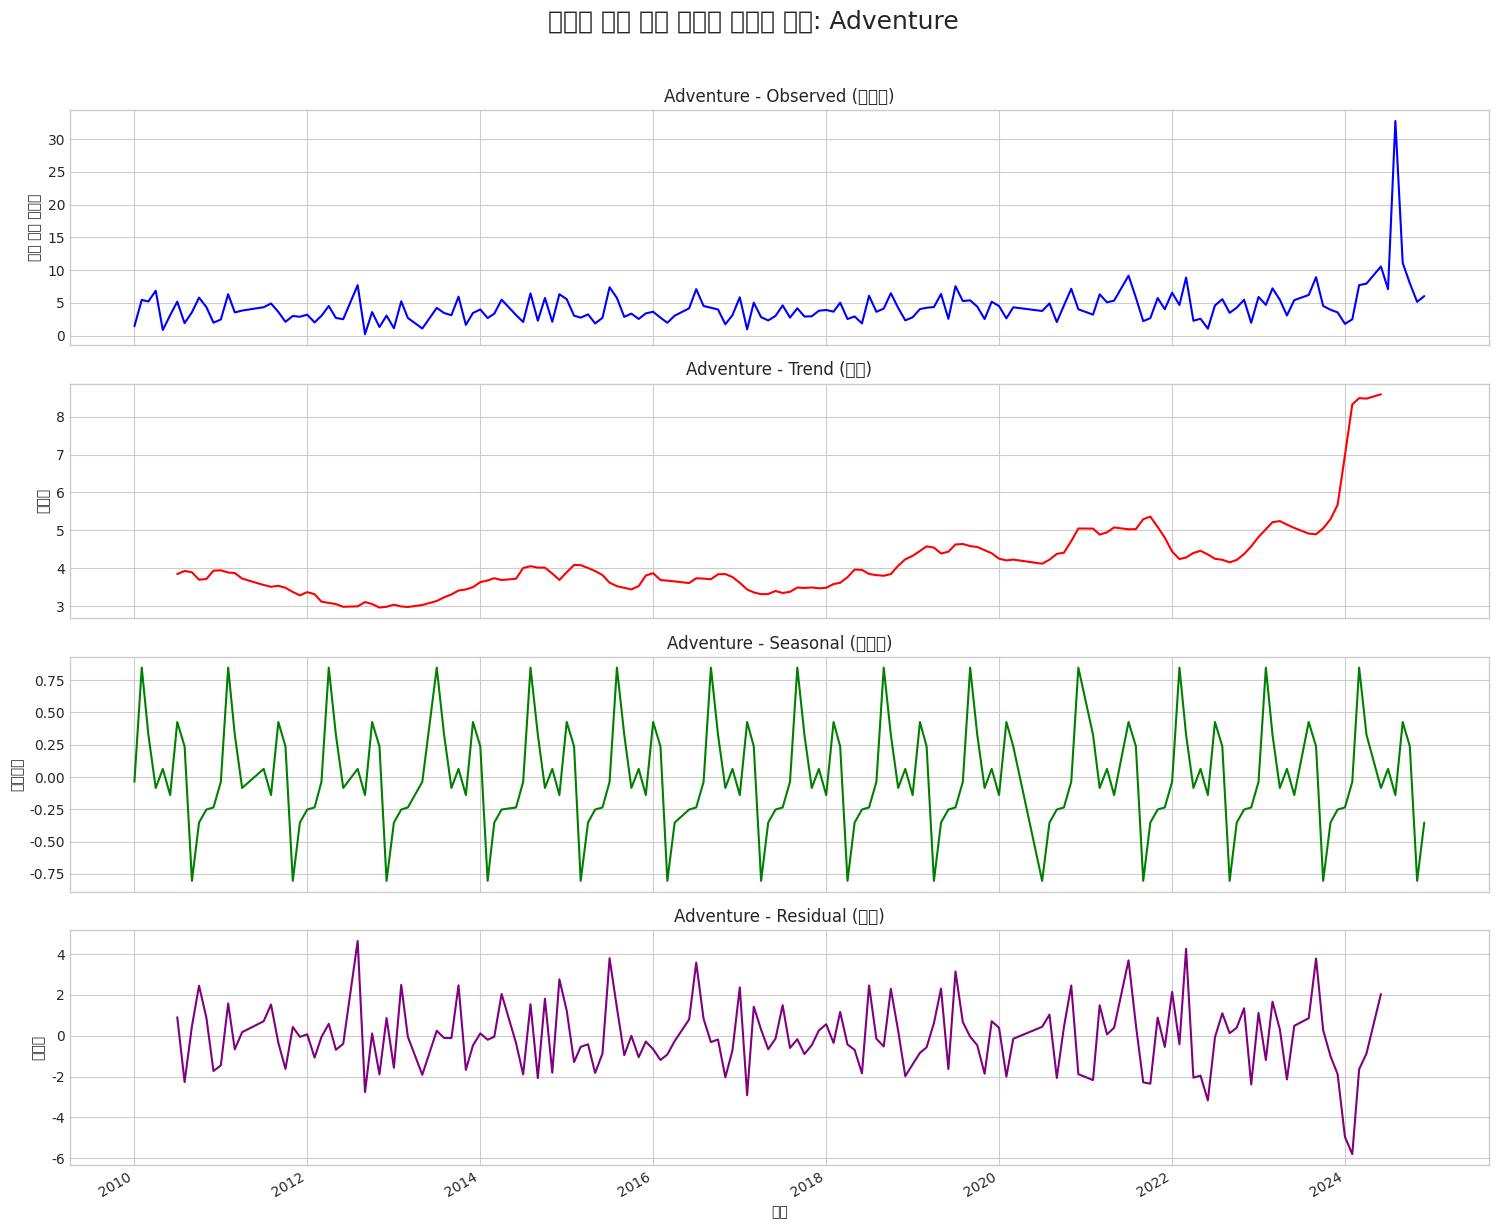


✅ 시계열 분해 및 시각화 작업이 성공적으로 완료되었습니다.

--- 스크립트 종료 ---


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
import os
import warnings

# 경고 메시지 무시 설정 (시계열 분해 경고 메시지 방지)
warnings.filterwarnings('ignore')

# --- 설정 (Configuration) ---
# 이전 단계에서 저장된 Explode된 데이터 파일 경로
INPUT_FILE_PATH = '/kaggle/working/final_processed_tmdb_data_exploded.csv'
OUTPUT_DIR = '/kaggle/working/'

print("--- 장르별 인기도 시계열 분해 스크립트 시작 ---")
print(f"입력 파일: {INPUT_FILE_PATH}")

# Matplotlib 스타일 및 한글 폰트 설정
plt.style.use('seaborn-v0_8-whitegrid')
try:
    plt.rcParams['font.family'] = 'NanumGothic'
except Exception:
    plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['axes.unicode_minus'] = False # 마이너스 폰트 깨짐 방지

try:
    # 1. 데이터 로드 및 전처리
    df = pd.read_csv(INPUT_FILE_PATH)
    
    # 'Id' 컬럼을 'id'로 변경 (사용자 요청 반영)
    if 'Id' in df.columns:
        df.rename(columns={'Id': 'id'}, inplace=True)

    # 필수 컬럼 결측치 제거 및 타입 변환
    df = df.dropna(subset=['popularity', 'year', 'month', 'genres'])
    df['year'] = df['year'].astype(int)
    df['month'] = df['month'].astype(int)
    
    # 2. 날짜 인덱스 생성 (시계열 분석을 위해 YYYY-MM-01 형식의 월별 인덱스 생성)
    # pandas to_datetime을 사용하여 year와 month를 결합하고, day는 1로 설정
    df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))
    
    # 3. 분석 대상 장르 선정 (인기도 합계 기준 상위 5개)
    df_clean_genres = df[~df['genres'].isin(['', 'None', 'Unknown'])]
    top_genres = df_clean_genres.groupby('genres')['popularity'].sum().nlargest(5).index.tolist()
    df_top_genres = df_clean_genres[df_clean_genres['genres'].isin(top_genres)]
    
    print(f"\n분석 대상 장르 (인기도 상위 5개): {top_genres}")

    # 4. 월별 평균 인기도 시계열 데이터 생성
    # 시계열 인덱스는 날짜로 설정하고, 월별 평균 인기도를 집계
    monthly_popularity = df_top_genres.groupby(['date', 'genres'])['popularity'].mean().reset_index()
    
    # 시계열 분해를 위해 장르별로 데이터프레임을 분리하고 날짜를 인덱스로 설정
    ts_data = {
        genre: monthly_popularity[monthly_popularity['genres'] == genre]
                     .set_index('date')['popularity']
                     .sort_index()
        for genre in top_genres
    }

    # --------------------------------------------------------
    # --- 5. 시계열 분해 및 시각화 ---
    # --------------------------------------------------------

    print("\n✅ 시계열 분해 (월별 평균 인기도, 주기=12개월) 시작...")

    for genre, ts in ts_data.items():
        if len(ts) < 24: # 분해를 위한 최소 데이터 포인트 (주기 12개월 * 2 = 24)
            print(f"경고: {genre} 장르의 데이터 포인트가 너무 적어 (현재: {len(ts)}개), 분해가 불안정할 수 있습니다.")
            # 데이터가 부족하면 다음 장르로 넘어감
            continue

        try:
            # 시계열 분해 (가법 모델, 주기=12개월)
            # 가법 모델 (Additive Model)은 계절성 변동폭이 시간이 지나도 일정할 때 적합함
            decomposition = seasonal_decompose(ts, model='additive', period=12)

            # 시각화
            fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12), sharex=True)
            
            decomposition.observed.plot(ax=ax1, title=f'{genre} - Observed (관측치)', color='b')
            ax1.set_ylabel('월별 평균 인기도')
            
            decomposition.trend.plot(ax=ax2, title=f'{genre} - Trend (추세)', color='r')
            ax2.set_ylabel('추세값')
            
            decomposition.seasonal.plot(ax=ax3, title=f'{genre} - Seasonal (계절성)', color='g')
            ax3.set_ylabel('계절성값')
            
            decomposition.resid.plot(ax=ax4, title=f'{genre} - Residual (잔차)', color='purple')
            ax4.set_ylabel('잔차값')
            ax4.set_xlabel('날짜')

            plt.suptitle(f'장르별 월별 평균 인기도 시계열 분해: {genre}', fontsize=18, y=1.02)
            plt.tight_layout()
            plt.savefig(os.path.join(OUTPUT_DIR, f'timeseries_decomposition_{genre.replace(" ", "_")}.png'))
            plt.show()
            
        except Exception as e:
            print(f"❌ {genre} 장르 시계열 분해 중 오류 발생: {e}")

    print("\n✅ 시계열 분해 및 시각화 작업이 성공적으로 완료되었습니다.")

except FileNotFoundError:
    print(f"\n❌ 오류: 입력 파일({INPUT_FILE_PATH})을 찾을 수 없습니다. 이전 단계의 파일 경로를 확인해 주세요.")
except Exception as e:
    print(f"\n❌ 예기치 않은 오류가 발생했습니다: {e}")
    import traceback
    print(traceback.format_exc())

print("\n--- 스크립트 종료 ---")


## 5. 2025 예측

--- 장르별 인기도 2025년 예측 스크립트 시작 ---

분석 대상 장르 (상위 5개): ['Drama', 'Comedy', 'Action', 'Thriller', 'Adventure']

✅ SARIMAX 모델 예측 시작 (2025년 12월까지)...


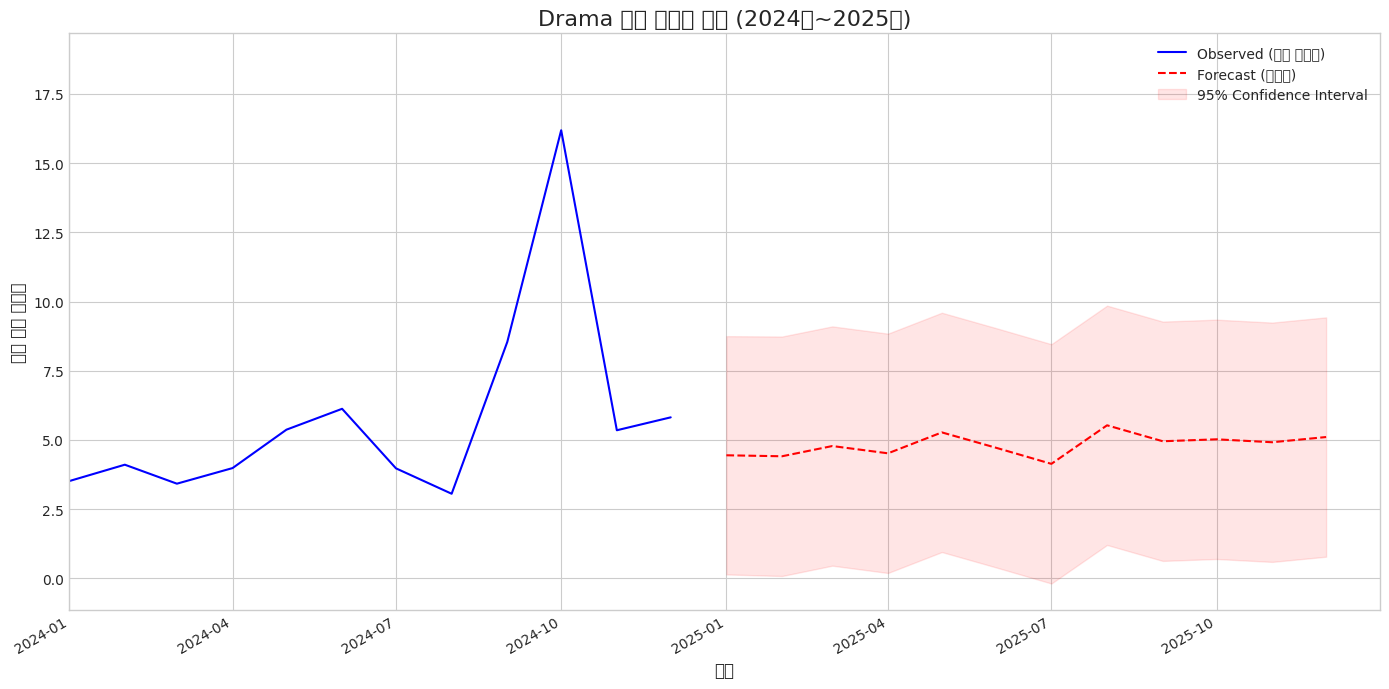

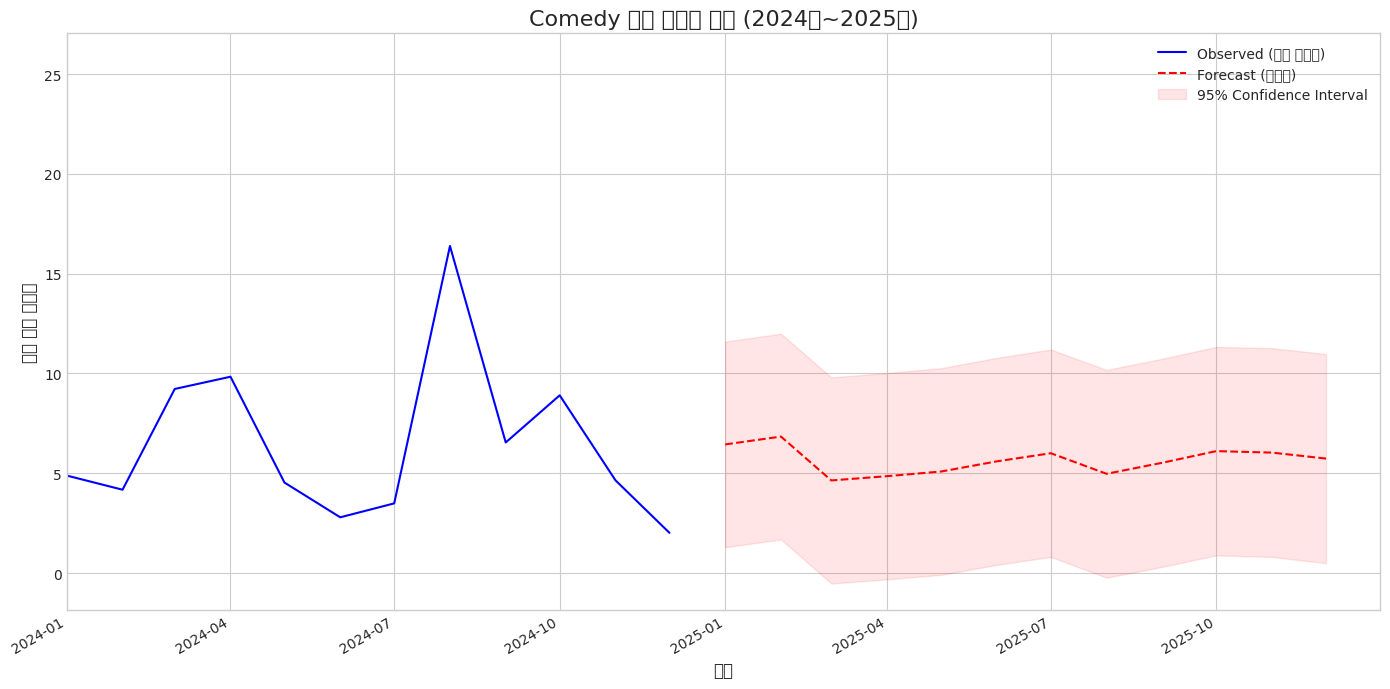

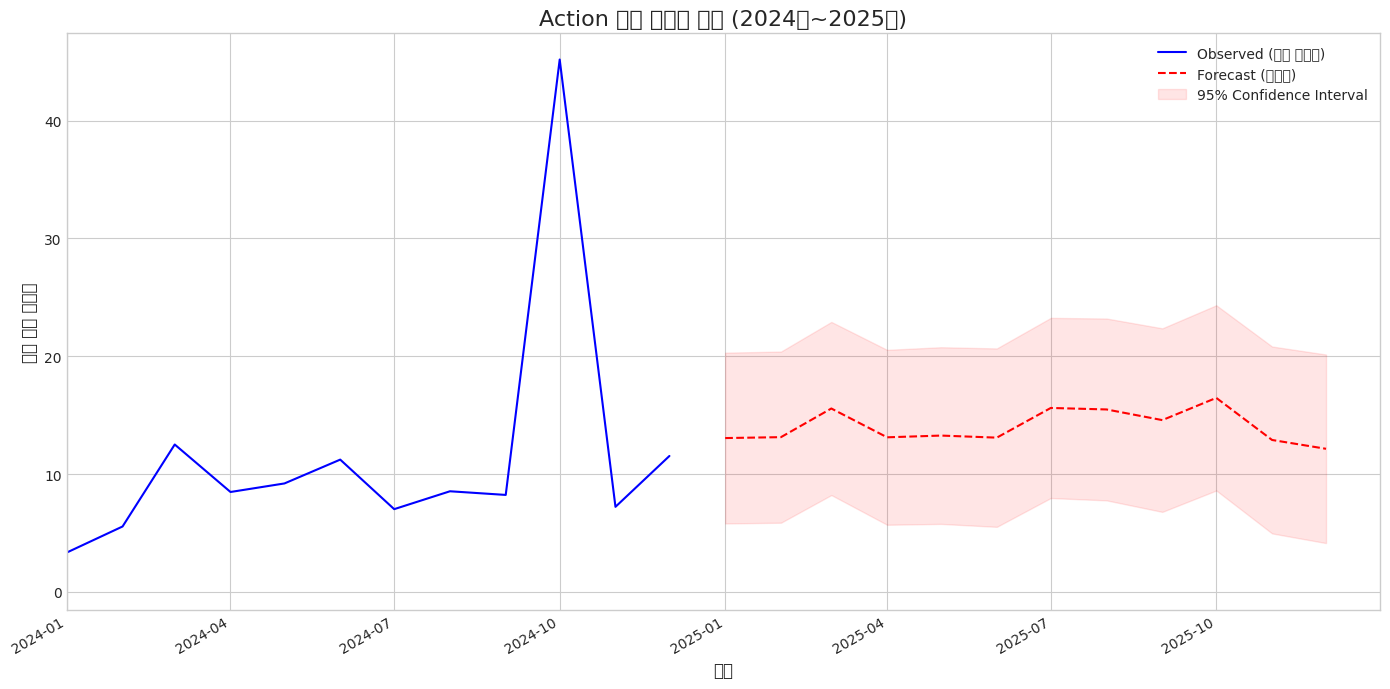

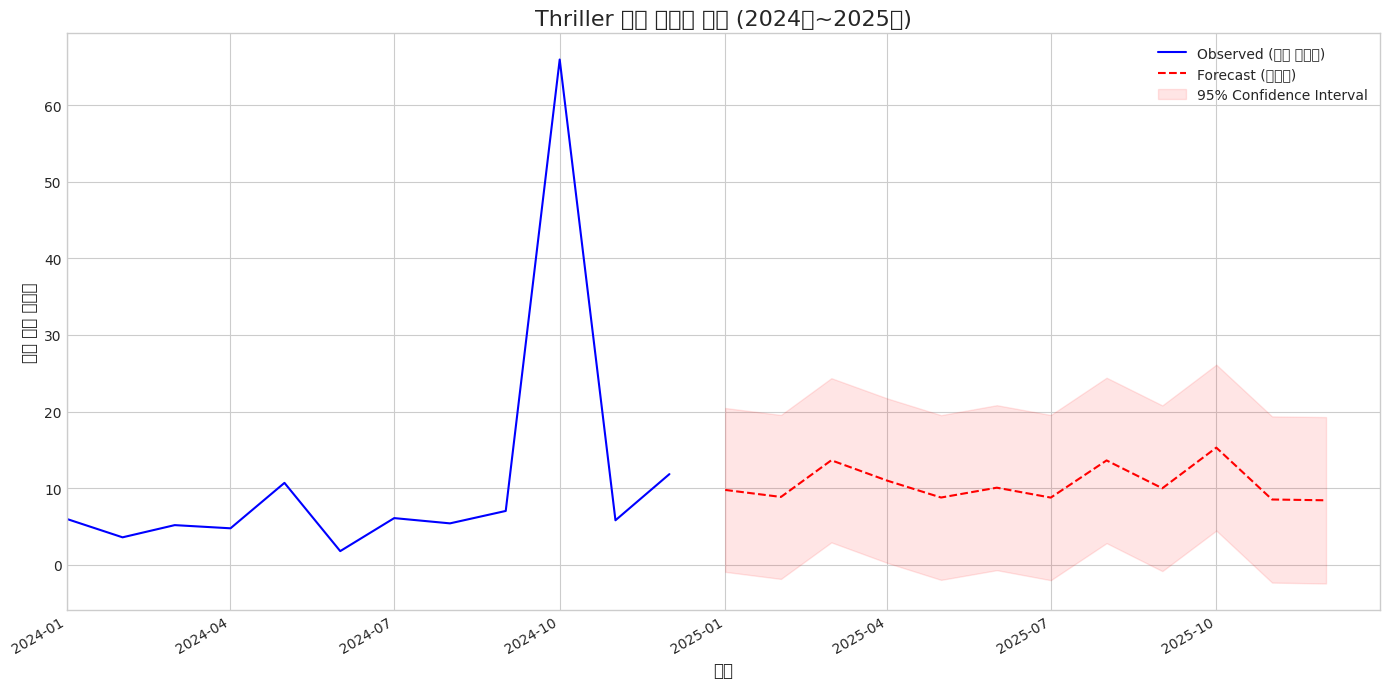

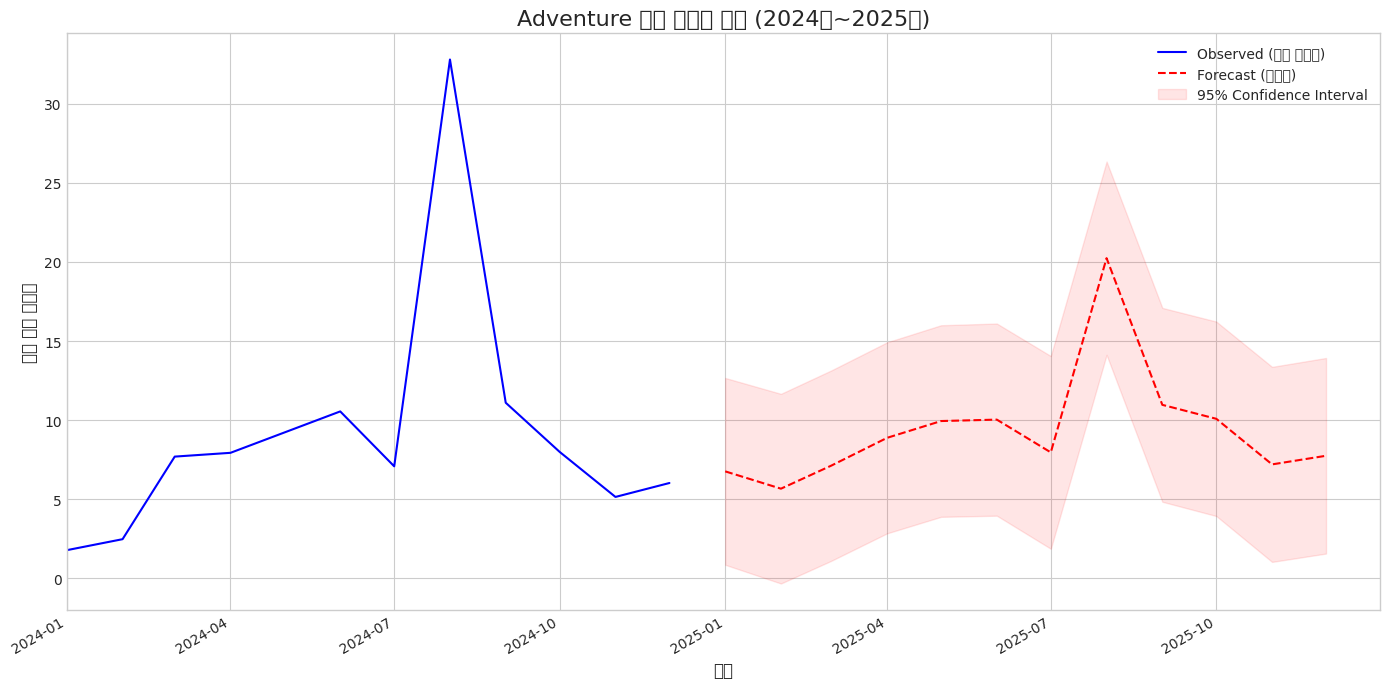


✅ 예측 및 시각화 작업이 완료되었습니다.

--- 스크립트 종료 ---


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
import os
import warnings

# 경고 메시지 무시 설정 (SARIMAX 수렴 경고 방지)
warnings.filterwarnings('ignore')

# --- 설정 (Configuration) ---
# 이전 단계에서 저장된 Explode된 데이터 파일 경로 (경로를 환경에 맞게 조정하세요)
INPUT_FILE_PATH = '/kaggle/working/final_processed_tmdb_data_exploded.csv'
OUTPUT_DIR = '/kaggle/working/'

# --- 실행 함수 ---
print("--- 장르별 인기도 2025년 예측 스크립트 시작 ---")

# Matplotlib 스타일 및 한글 폰트 설정
plt.style.use('seaborn-v0_8-whitegrid')
try:
    plt.rcParams['font.family'] = 'NanumGothic'
except Exception:
    plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.unicode_minus'] = False 

try:
    # 1. 데이터 로드 및 전처리
    df = pd.read_csv(INPUT_FILE_PATH)

    # 'Id' 컬럼을 'id'로 변경
    if 'Id' in df.columns:
        df.rename(columns={'Id': 'id'}, inplace=True)

    # 필수 컬럼 결측치 제거 및 타입 변환
    df = df.dropna(subset=['popularity', 'year', 'month', 'genres'])
    df['year'] = df['year'].astype(int)
    df['month'] = df['month'].astype(int)

    # 2. 날짜 인덱스 생성
    df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

    # 3. 분석 대상 장르 선정 (인기도 합계 기준 상위 5개)
    df_clean_genres = df[~df['genres'].isin(['', 'None', 'Unknown'])]
    top_genres = df_clean_genres.groupby('genres')['popularity'].sum().nlargest(5).index.tolist()
    df_top_genres = df_clean_genres[df_clean_genres['genres'].isin(top_genres)]

    print(f"\n분석 대상 장르 (상위 5개): {top_genres}")

    # 4. 월별 평균 인기도 시계열 데이터 생성
    monthly_popularity = df_top_genres.groupby(['date', 'genres'])['popularity'].mean().reset_index()

    ts_data = {
        genre: monthly_popularity[monthly_popularity['genres'] == genre]
                     .set_index('date')['popularity']
                     .sort_index()
        for genre in top_genres
    }

    # 5. 예측 및 시각화
    print("\n✅ SARIMAX 모델 예측 시작 (2025년 12월까지)...")

    # 예측 종료 날짜 설정 (2025년 12월 1일)
    forecast_end_date = pd.to_datetime('2025-12-01')

    # X축 범위 설정을 위한 시작일 지정
    plot_start_date = pd.to_datetime('2024-01-01') 
    
    for genre, ts in ts_data.items():
        if len(ts) < 24: 
            print(f"경고: {genre} 장르의 데이터 포인트가 너무 적어 ({len(ts)}개), 예측을 건너뜁니다.")
            continue

        last_date = ts.index.max()
        if last_date >= forecast_end_date:
            print(f"경고: {genre} 장르 데이터가 이미 2025년 12월 이후를 포함하여 예측을 건너뜁니다.")
            continue

        try:
            # 1. 모델 구축 및 훈련
            model = SARIMAX(ts, 
                            order=(1, 1, 1), 
                            seasonal_order=(1, 1, 1, 12),
                            enforce_stationarity=False,
                            enforce_invertibility=False)
            
            model_fit = model.fit(disp=False)
            
            # 2. 예측 스텝 수 계산 및 정수 인덱스 설정
            forecast_start_date = last_date + pd.DateOffset(months=1)
            steps_to_forecast = len(pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='MS'))
            
            # 정수 인덱스를 사용하여 예측 시작 (len(ts)) 부터 예측 끝까지 수행
            forecast_result = model_fit.get_prediction(start=len(ts), end=len(ts) + steps_to_forecast - 1)
            
            # 예측값 및 신뢰 구간 추출
            pred_mean = forecast_result.predicted_mean
            conf_int = forecast_result.conf_int()
            
            # 예측 인덱스 생성 및 재할당
            forecast_index = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='MS')
            pred_mean.index = forecast_index
            conf_int.index = forecast_index
            
            # 3. 시각화
            plt.figure(figsize=(14, 7))
            
            # 과거 데이터 (observed)
            ts.plot(label='Observed (과거 데이터)', color='blue')
            
            # 예측값 (forecast)
            pred_mean.plot(ax=plt.gca(), label='Forecast (예측치)', color='red', linestyle='--')
            
            # 신뢰 구간 (Confidence Interval)
            plt.fill_between(conf_int.index,
                             conf_int.iloc[:, 0],
                             conf_int.iloc[:, 1], color='red', alpha=0.1, label='95% Confidence Interval')
            
            # X축 범위 설정 (2024년~2025년 확대)
            plt.xlim(plot_start_date, pd.to_datetime('2025-12-31')) 
            
            plt.title(f'{genre} 장르 인기도 예측 (2024년~2025년)', fontsize=16)
            plt.xlabel('날짜', fontsize=12)
            plt.ylabel('월별 평균 인기도', fontsize=12)
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.savefig(os.path.join(OUTPUT_DIR, f'genre_forecast_2025_zoomed_{genre.replace(" ", "_")}.png'))
            plt.show()

        except Exception as e:
            print(f"❌ {genre} 장르 예측 중 오류 발생: {e}")
            import traceback
            print(traceback.format_exc())

    print("\n✅ 예측 및 시각화 작업이 완료되었습니다.")

except Exception as e:
    print(f"❌ 예기치 않은 오류가 발생했습니다: {e}")
    import traceback
    print(traceback.format_exc())

print("\n--- 스크립트 종료 ---")


## 5-2. 예측과 실제 데이터 비교

### 먼저 2025 all movies 전처리 

In [19]:
import pandas as pd
import os
import numpy as np

# --- 설정 (Configuration) ---
# 1. 2025년 원본 데이터 파일 (방금 업로드한 파일)
INPUT_FILE = '/kaggle/input/tmdb-raw-data/2025_movies_only.csv' 

# 2. 처리된 2025년 데이터를 저장할 파일 (Exploded 및 컬럼 선택)
OUTPUT_DIR = '/kaggle/working/'
OUTPUT_FILE = os.path.join(OUTPUT_DIR, '2025_movies_processed.csv')

# 3. 사용자가 요청한 최종 컬럼 목록 (소문자 'id'로 수정)
FINAL_COLUMNS = [
    'id', 
    'title', 
    'budget', 
    'popularity', 
    'genres', 
    'production_companies', 
    'production_countries', 
    'cast', 
    'director', 
    'writers', 
    'year', 
    'month'
]

print(f"--- 2025년 데이터 전처리 스크립트 (Explode 및 컬럼 선택) ---")
print(f"입력 파일: {INPUT_FILE}")

try:
    # 1. 2025년 데이터 로드
    df = pd.read_csv(INPUT_FILE, low_memory=False)
    print(f"로드 완료: 총 {len(df)} 행.")

    # ==============================================================
    # ✅ 2. release_date를 사용하여 year, month 생성
    # ==============================================================
    if 'release_date' not in df.columns:
        raise ValueError("오류: 'release_date' 컬럼이 2025년 파일에 없습니다.")
        
    df['release_datetime'] = pd.to_datetime(df['release_date'], errors='coerce')
    df['year'] = df['release_datetime'].dt.year
    df['month'] = df['release_datetime'].dt.month
    
    # (파일에 2025년이 아닌 데이터가 섞여있을 수 있으므로 필터링)
    df['year'] = pd.to_numeric(df['year'], errors='coerce')
    df = df[df['year'] == 2025].copy()
    
    # 3. 장르 컬럼(genres) 전처리 (NaN 값 처리)
    # (업로드된 파일 스니펫에서 장르가 'Adventure, Action, Fantasy' 형식인 것을 확인)
    df['genres'] = df['genres'].fillna('')
    
    # 4. 장르 분리 (', ' 기준으로 분리)
    df['genres_list'] = df['genres'].str.split(', ')
    
    # 5. 장르 행 확장 (Explode)
    print("장르 행 확장(Explode) 중...")
    df_exploded = df.explode('genres_list')
    
    # 6. 인덱스 리셋 (ValueError: cannot reindex... 오류 해결)
    df_exploded = df_exploded.reset_index(drop=True)
    
    # 7. 컬럼 이름 통일 (genres_list -> genres)
    df_exploded.rename(columns={'genres_list': 'genres'}, inplace=True)
    
    # 8. 요청한 컬럼만 선택하여 저장
    
    # 2025년 파일(df_exploded)에 *실제로* 존재하는 컬럼만 필터링
    columns_to_keep = [col for col in FINAL_COLUMNS if col in df_exploded.columns]
    
    # 누락된 컬럼이 있는지 확인 (참고용)
    missing_cols = [col for col in FINAL_COLUMNS if col not in columns_to_keep]
    if missing_cols:
        print(f"참고: 요청한 컬럼 중 다음 컬럼이 원본에 없어 제외됩니다: {missing_cols}")
        
    df_final = df_exploded[columns_to_keep]

    # 9. CSV로 저장
    df_final.to_csv(OUTPUT_FILE, index=False, encoding='utf-8')
    
    print(f"✅ 전처리 완료. {len(df_final)} 행의 데이터를 '{OUTPUT_FILE}'에 저장했습니다.")
    print(f"저장된 컬럼: {columns_to_keep}")

except FileNotFoundError:
    print(f"❌ 오류: 입력 파일('{INPUT_FILE}')을 찾을 수 없습니다.")
    print("Kaggle 환경에 '2025_movies_only.csv' 파일이 업로드되었는지 확인하세요.")
except Exception as e:
    print(f"❌ 예기치 않은 오류가 발생했습니다: {e}")
    import traceback
    print(traceback.format_exc())

print("\n--- 스크립트 종료 ---")

--- 2025년 데이터 전처리 스크립트 (Explode 및 컬럼 선택) ---
입력 파일: /kaggle/input/tmdb-raw-data/2025_movies_only.csv
로드 완료: 총 42190 행.
장르 행 확장(Explode) 중...
✅ 전처리 완료. 62361 행의 데이터를 '/kaggle/working/2025_movies_processed.csv'에 저장했습니다.
저장된 컬럼: ['id', 'title', 'budget', 'popularity', 'genres', 'production_companies', 'production_countries', 'cast', 'director', 'writers', 'year', 'month']

--- 스크립트 종료 ---


### 비교 시작

--- 2025년 예측 vs 실제 인기도 비교 스크립트 (최종) ---
훈련 데이터: /kaggle/working/final_processed_tmdb_data_exploded.csv
2025년 실제 데이터: /kaggle/working/2025_movies_processed.csv
'/kaggle/working/final_processed_tmdb_data_exploded.csv'에서 훈련 데이터 로드 중...
분석 대상 상위 5개 장르: ['Drama', 'Comedy', 'Action', 'Thriller', 'Adventure']
'/kaggle/working/2025_movies_processed.csv' 로드 성공. (총 62361 행)
2025년 실제 데이터 처리 완료.

✅ SARIMAX 예측 및 비교 시각화 시작...


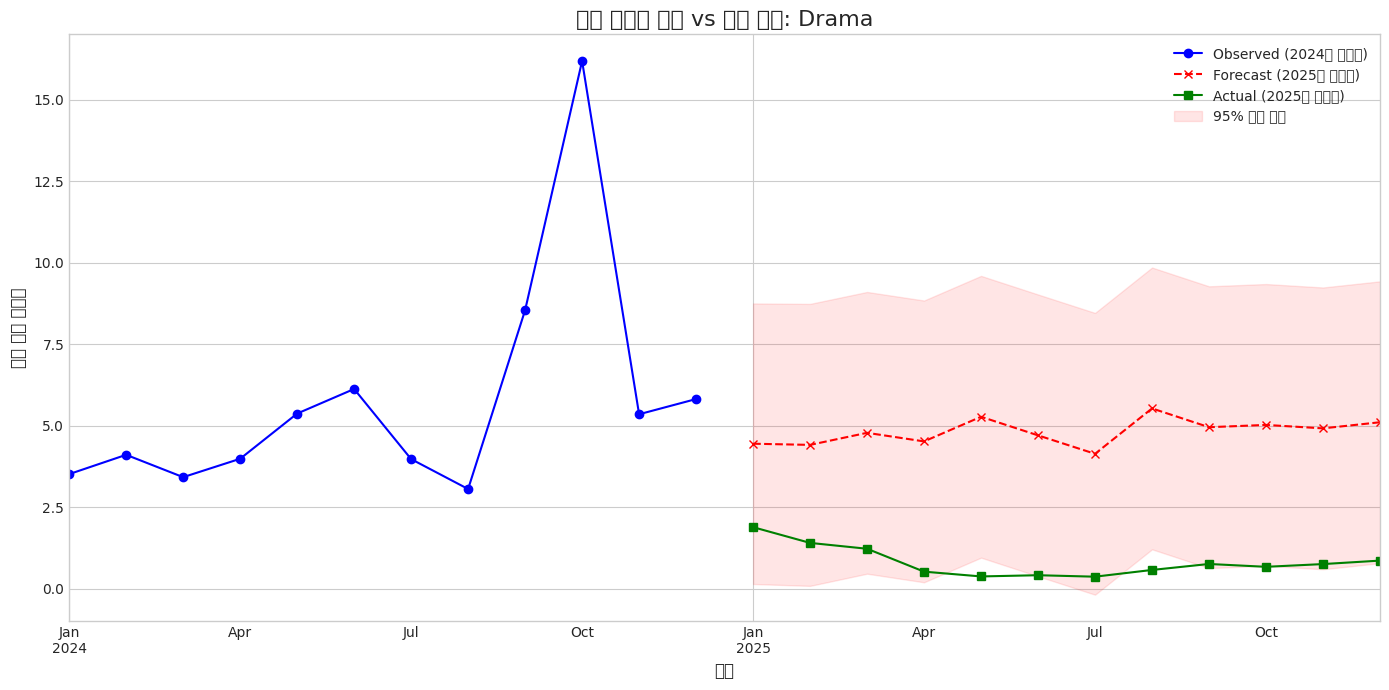

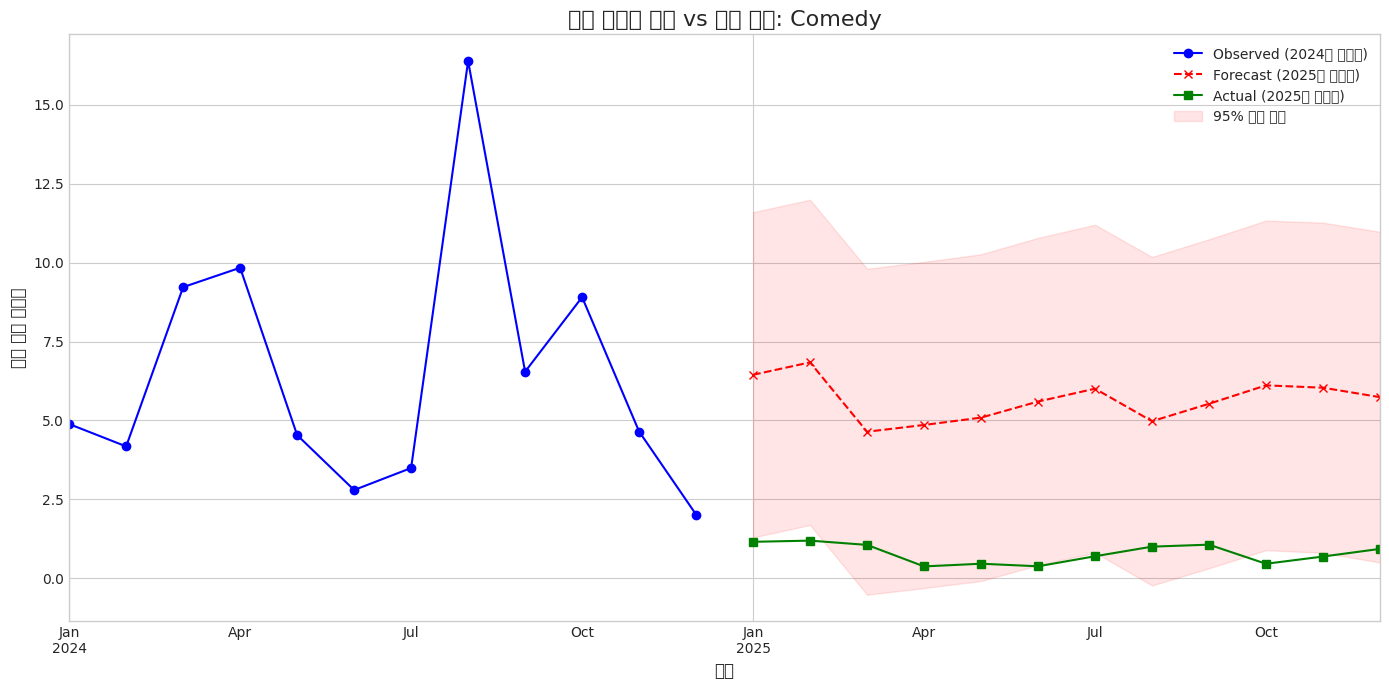

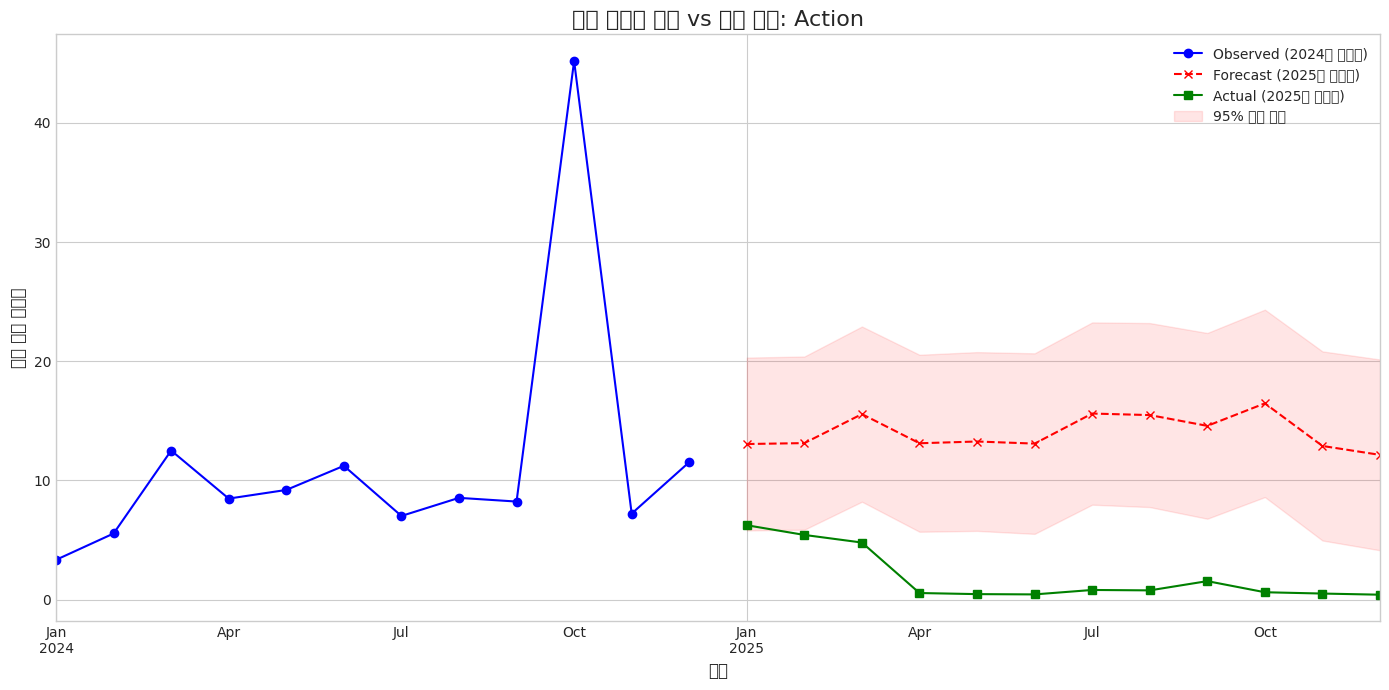

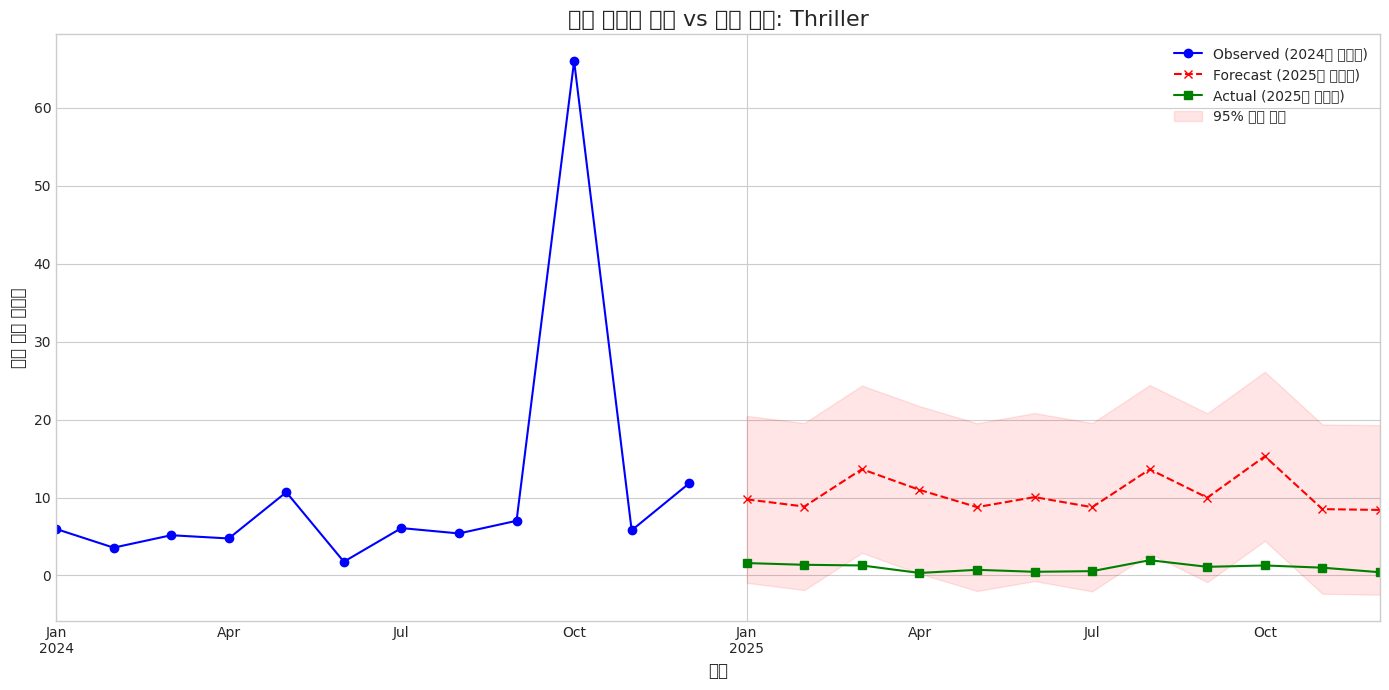

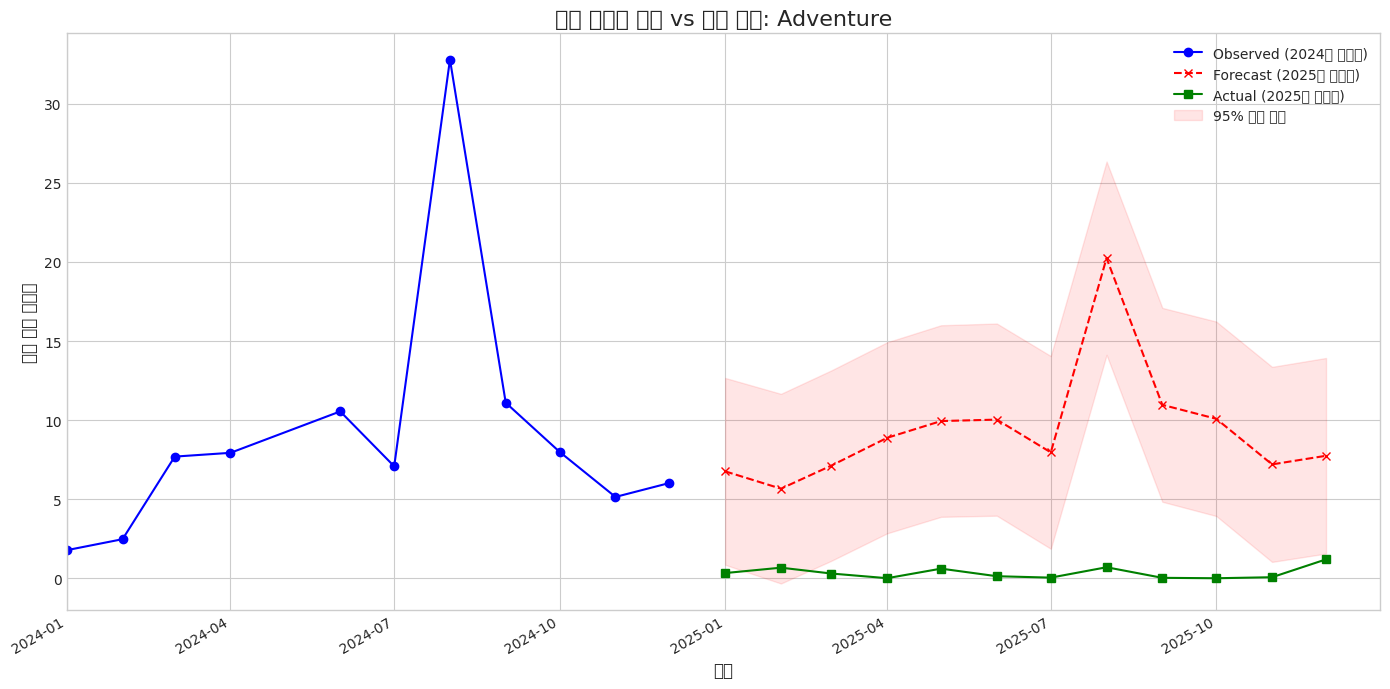


✅ 예측 vs 실제 비교 시각화 작업이 완료되었습니다.

--- 스크립트 종료 ---


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
import os
import warnings

# 경고 메시지 무시 설정 (SARIMAX 수렴 경고 방지)
warnings.filterwarnings('ignore')

# --- 설정 (Configuration) ---
# 1. 훈련 데이터 파일 경로 (2024년까지의 Exploded 데이터)
INPUT_TRAIN_FILE = '/kaggle/working/final_processed_tmdb_data_exploded.csv'

# 2. 2025년 실제 데이터 파일 경로 (방금 전처리한 Exploded 2025 데이터)
INPUT_ACTUAL_2025_FILE = '/kaggle/working/2025_movies_processed.csv'

# 3. 출력 디렉토리
OUTPUT_DIR = '/kaggle/working/'

# --- 실행 함수 ---
print("--- 2025년 예측 vs 실제 인기도 비교 스크립트 (최종) ---")
print(f"훈련 데이터: {INPUT_TRAIN_FILE}")
print(f"2025년 실제 데이터: {INPUT_ACTUAL_2025_FILE}")

# Matplotlib 스타일 및 한글 폰트 설정
plt.style.use('seaborn-v0_8-whitegrid')
try:
    plt.rcParams['font.family'] = 'NanumGothic'
except Exception:
    plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.unicode_minus'] = False 

def get_actual_2025_data(actual_file_path, top_genres):
    """
    '2025_movies_processed.csv' 파일에서 실제 월별 평균 인기도를 계산합니다.
    """
    try:
        df_2025 = pd.read_csv(actual_file_path, low_memory=False)
        print(f"'{actual_file_path}' 로드 성공. (총 {len(df_2025)} 행)")
    except FileNotFoundError:
        print(f"❌ 경고: {actual_file_path} 파일을 찾을 수 없습니다. (이전 단계 스크립트를 먼저 실행하세요)")
        empty_df = pd.DataFrame(columns=top_genres, dtype=float) 
        empty_df.index.name = 'date'
        return empty_df.fillna(np.nan)
        
    if df_2025.empty:
        print("경고: 2025년 실제 데이터 파일이 비어있습니다.")
        empty_df = pd.DataFrame(columns=top_genres, dtype=float) 
        empty_df.index.name = 'date'
        return empty_df.fillna(np.nan)

    # 날짜 컬럼 변환
    df_2025['date'] = pd.to_datetime(df_2025[['year', 'month']].assign(day=1))
    
    # 분석 대상 장르만 필터링
    df_2025_filtered = df_2025[df_2025['genres'].isin(top_genres)]
    
    if df_2025_filtered.empty:
        print("경고: 2025년 데이터에서 상위 5개 장르를 찾을 수 없습니다.")
        empty_df = pd.DataFrame(columns=top_genres, dtype=float) 
        empty_df.index.name = 'date'
        return empty_df.fillna(np.nan)

    # 월별 평균 인기도 집계
    actual_ts = df_2025_filtered.groupby(['date', 'genres'])['popularity'].mean().unstack()
    print("2025년 실제 데이터 처리 완료.")
    
    return actual_ts

try:
    # 1. SARIMAX 훈련 데이터 로드
    print(f"'{INPUT_TRAIN_FILE}'에서 훈련 데이터 로드 중...")
    df_exploded = pd.read_csv(INPUT_TRAIN_FILE)
    df_exploded = df_exploded.dropna(subset=['popularity', 'year', 'month', 'genres'])
    df_exploded['year'] = df_exploded['year'].astype(int)
    df_exploded['month'] = df_exploded['month'].astype(int)
    df_exploded['date'] = pd.to_datetime(df_exploded[['year', 'month']].assign(day=1))

    # 2. 분석 대상 장르 선정
    top_genres = df_exploded.groupby('genres')['popularity'].sum().nlargest(5).index.tolist()
    print(f"분석 대상 상위 5개 장르: {top_genres}")
    
    # 3. 훈련용 시계열 데이터 생성
    df_top_genres = df_exploded[df_exploded['genres'].isin(top_genres)]
    monthly_popularity = df_top_genres.groupby(['date', 'genres'])['popularity'].mean().reset_index()

    ts_data = {
        genre: monthly_popularity[monthly_popularity['genres'] == genre]
                     .set_index('date')['popularity']
                     .sort_index()
        for genre in top_genres
    }

    # 4. 실제 2025년 데이터 로드
    actual_2025_data = get_actual_2025_data(INPUT_ACTUAL_2025_FILE, top_genres)
    
    if actual_2025_data.empty:
         print("\n**중요:** 2025년 실제 데이터가 충분하지 않아 비교 그래프가 비어있을 수 있습니다.")

    # 5. 예측 및 시각화
    print("\n✅ SARIMAX 예측 및 비교 시각화 시작...")

    forecast_end_date = pd.to_datetime('2025-12-01')
    plot_start_date = pd.to_datetime('2024-01-01') 
    
    for genre, ts in ts_data.items():
        # 훈련 데이터를 2024년까지로 제한
        ts_train = ts[ts.index.year <= 2024]
        
        if len(ts_train) < 24: 
            print(f"경고: {genre} 장르의 훈련 데이터(2024년까지)가 너무 적어 ({len(ts_train)}개), 예측을 건너뜁니다.")
            continue
            
        if ts_train.empty:
            print(f"경고: {genre} 장르 훈련 데이터(2024년까지)가 비어있습니다. 건너뜁니다.")
            continue

        # ==============================================================
        # ✅ IndentationError 오류 해결 지점
        # 'try' 블록의 들여쓰기를 'for' 루프 내부에 맞춥니다.
        # ==============================================================
        try:
            # 1. 모델 구축 및 훈련 (ts_train 사용)
            model = SARIMAX(ts_train, 
                            order=(1, 1, 1), 
                            seasonal_order=(1, 1, 1, 12),
                            enforce_stationarity=False,
                            enforce_invertibility=False)
            
            model_fit = model.fit(disp=False)
            
            # 2. 예측 스텝 수 계산 및 정수 인덱스 설정 (2025년 1월 1일부터 12개월)
            forecast_start_date = pd.to_datetime('2025-01-01')
            steps_to_forecast = len(pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='MS'))
            
            start_pos = len(ts_train) 
            end_pos = start_pos + steps_to_forecast - 1
            
            forecast_result = model_fit.get_prediction(start=start_pos, end=end_pos)
            
            # 예측값 및 신뢰 구간 추출
            pred_mean = forecast_result.predicted_mean
            conf_int = forecast_result.conf_int()
            
            # 예측 인덱스 생성 및 재할당 (2025-01-01 ~ 2025-12-01)
            forecast_index = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='MS')
            pred_mean.index = forecast_index
            conf_int.index = forecast_index
            
            # 3. 실제 2025년 데이터 추출
            actual_2025 = actual_2025_data[genre].dropna() 
            
            # 4. 시각화
            plt.figure(figsize=(14, 7))
            
            # 2024년 데이터 (observed)
            ts_train[ts_train.index.year >= 2024].plot(label='Observed (2024년 데이터)', color='blue', marker='o')
            
            # 예측값 (Forecast 2025)
            pred_mean.plot(ax=plt.gca(), label='Forecast (2025년 예측치)', color='red', linestyle='--', marker='x')
            
            # 실제 2025년 데이터 (Actual 2025)
            if not actual_2025.empty:
                actual_2025.plot(ax=plt.gca(), label='Actual (2025년 실제값)', color='green', marker='s')
            
            # 신뢰 구간 (Confidence Interval)
            plt.fill_between(conf_int.index,
                             conf_int.iloc[:, 0],
                             conf_int.iloc[:, 1], color='red', alpha=0.1, label='95% 신뢰 구간')
            
            # X축 범위 설정 (2024년~2025년 확대)
            plt.xlim(plot_start_date, pd.to_datetime('2025-12-31')) 
            
            plt.title(f'장르 인기도 예측 vs 실제 비교: {genre}', fontsize=16)
            plt.xlabel('날짜', fontsize=12)
            plt.ylabel('월별 평균 인기도', fontsize=12)
            plt.legend(loc='upper right')
            plt.grid(True)
            plt.tight_layout()
            plt.savefig(os.path.join(OUTPUT_DIR, f'forecast_vs_actual_{genre.replace(" ", "_")}.png'))
            plt.show()

        # ==============================================================
        # ✅ IndentationError 오류 해결 지점
        # 'except' 블록을 'try' 블록과 동일한 들여쓰기 수준으로 맞춥니다.
        # ==============================================================
        except KeyError as ke:
             print(f"❌ {genre} 장르 처리 중 KeyError 발생 (2025년 실제 데이터에 해당 장르가 없거나 비어있을 수 있음): {ke}")
        except Exception as e:
            print(f"❌ {genre} 장르 예측 및 시각화 중 오류 발생: {e}")
            import traceback
            print(traceback.format_exc())

    print("\n✅ 예측 vs 실제 비교 시각화 작업이 완료되었습니다.")

except FileNotFoundError as fnf:
    print(f"❌ 필수 파일 없음: {fnf.filename}")
    print(f"'{INPUT_TRAIN_FILE}' 또는 '{INPUT_ACTUAL_2025_FILE}' 파일이 올바른 경로에 있는지 확인하세요.")
except Exception as e:
    print(f"❌ 예기치 않은 오류가 발생했습니다: {e}")
    import traceback
    print(traceback.format_exc())

print("\n--- 스크립트 종료 ---")